In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L14/'
foldername = '../../MFUs/Runs_15-09-20_EasyPhase_L14/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_29-09-20_nsms64_nips2/'

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist = ['KEasyPhase_L14_it0_nsm64_folder/backup',
                'KEasyPhase_L14_it1_nsm64_folder/backup',
                'KEasyPhase_L14_it2_nsm64_folder/backup',
                'KEasyPhase_L14_it3_nsm64_folder/backup',
                'KEasyPhase_L14_it4_nsm64_folder/backup',
                'KEasyPhase_L14_it5_nsm64_folder/backup',
                #'KEasyPhase_L14_it6_nsm64_folder/backup',
                'KEasyPhase_L14_it7_nsm64_folder/backup',
                #'KEasyPhase_L14_it8_nsm64_folder/backup',
                'KEasyPhase_L14_it9_nsm64_folder/backup',
                'KEasyPhase_L14_it10_nsm64_folder/backup',
                'KEasyPhase_L14_it11_nsm64_folder/backup',
                'KEasyPhase_L14_it12_nsm64_folder/backup',
                'KEasyPhase_L14_it13_nsm64_folder/backup',
                'KEasyPhase_L14_it14_nsm64_folder/backup',
                'KEasyPhase_L14_it15_nsm64_folder/backup',
                'KEasyPhase_L14_it16_nsm64_folder/backup',
                'KEasyPhase_L14_it17_nsm64_folder/backup',
                'KEasyPhase_L14_it18_nsm64_folder/backup',
                'KEasyPhase_L14_it19_nsm64_folder/backup',
                'KEasyPhase_L14_it20_nsm64_folder/backup',
                'KEasyPhase_L14_it21_nsm64_folder/backup',
                'KEasyPhase_L14_it22_nsm64_folder/backup',
                'KEasyPhase_L14_it23_nsm64_folder/backup',
                'KEasyPhase_L14_it24_nsm64_folder/backup',
                'KEasyPhase_L14_it25_nsm64_folder/backup',
                'KEasyPhase_L14_it26_nsm64_folder/backup',
                'KEasyPhase_L14_it27_nsm64_folder/backup',
                'KEasyPhase_L14_it28_nsm64_folder/backup',
                'KEasyPhase_L14_it29_nsm64_folder/backup',
                'KEasyPhase_L14_it30_nsm64_folder/backup',
                'KEasyPhase_L14_it31_nsm64_folder/backup'
               ]

filenamelist = ['KEasyPhase_L14_it0_nsm64_folder/backup',
                'KEasyPhase_L14_it1_nsm64_folder/backup',
                'KEasyPhase_L14_it2_nsm64_folder/backup',
                'KEasyPhase_L14_it3_nsm64_folder/backup'
               ]
filenamelist = ['KEasyPhase_L14_it0_nsm64_nips2_Mem_folder/backup',
                'KEasyPhase_L14_it1_nsm64_nips2_Mem_folder/backup',
                'KEasyPhase_L14_it2_nsm64_nips2_Mem_folder/backup',
                'KEasyPhase_L14_it3_nsm64_nips2_Mem_folder/backup'
               ]
n = len(filenamelist)

In [4]:
mergeruns = False
pairruns = False
nb_drop = 0
kw = {'mergeruns':mergeruns, 'pairruns': pairruns}

[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist, **kw)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt, **kw)


failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)], **kw)


nb  [32, 32, 32, 32] num_in_bin  [2, 2, 2, 2]
[[222462]
 [222669]
 [222695]
 [222745]
 [222589]
 [222843]
 [222469]
 [222737]
 [222638]
 [222636]
 [222502]
 [222753]
 [222526]
 [222733]
 [222532]
 [222889]
 [222597]
 [222720]
 [222492]
 [222787]
 [222574]
 [222760]
 [222698]
 [222734]
 [222704]
 [222762]
 [222672]
 [222693]
 [222432]
 [222649]
 [222437]
 [222746]
 [222435]
 [222522]
 [222044]
 [222157]
 [222011]
 [221886]
 [221588]
 [221726]
 [221334]
 [221371]
 [220568]
 [220484]
 [219938]
 [219659]
 [219127]
 [218138]
 [217419]
 [216414]
 [215890]
 [214910]
 [214355]
 [212902]
 [211543]
 [210182]
 [210169]
 [208891]
 [207858]
 [206868]
 [206129]
 [204147]
 [203483]
 [202375]
 [200932]
 [200373]
 [199253]
 [197733]
 [196817]
 [195087]
 [194308]
 [193184]
 [191395]
 [190525]
 [189700]
 [187747]
 [187640]
 [186645]
 [185805]
 [185181]
 [184579]
 [183822]
 [182240]
 [182121]
 [181079]
 [180523]
 [180583]
 [179561]
 [179301]
 [178976]
 [178314]
 [177999]
 [177924]
 [176988]
 [176802]
 [17

In [5]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


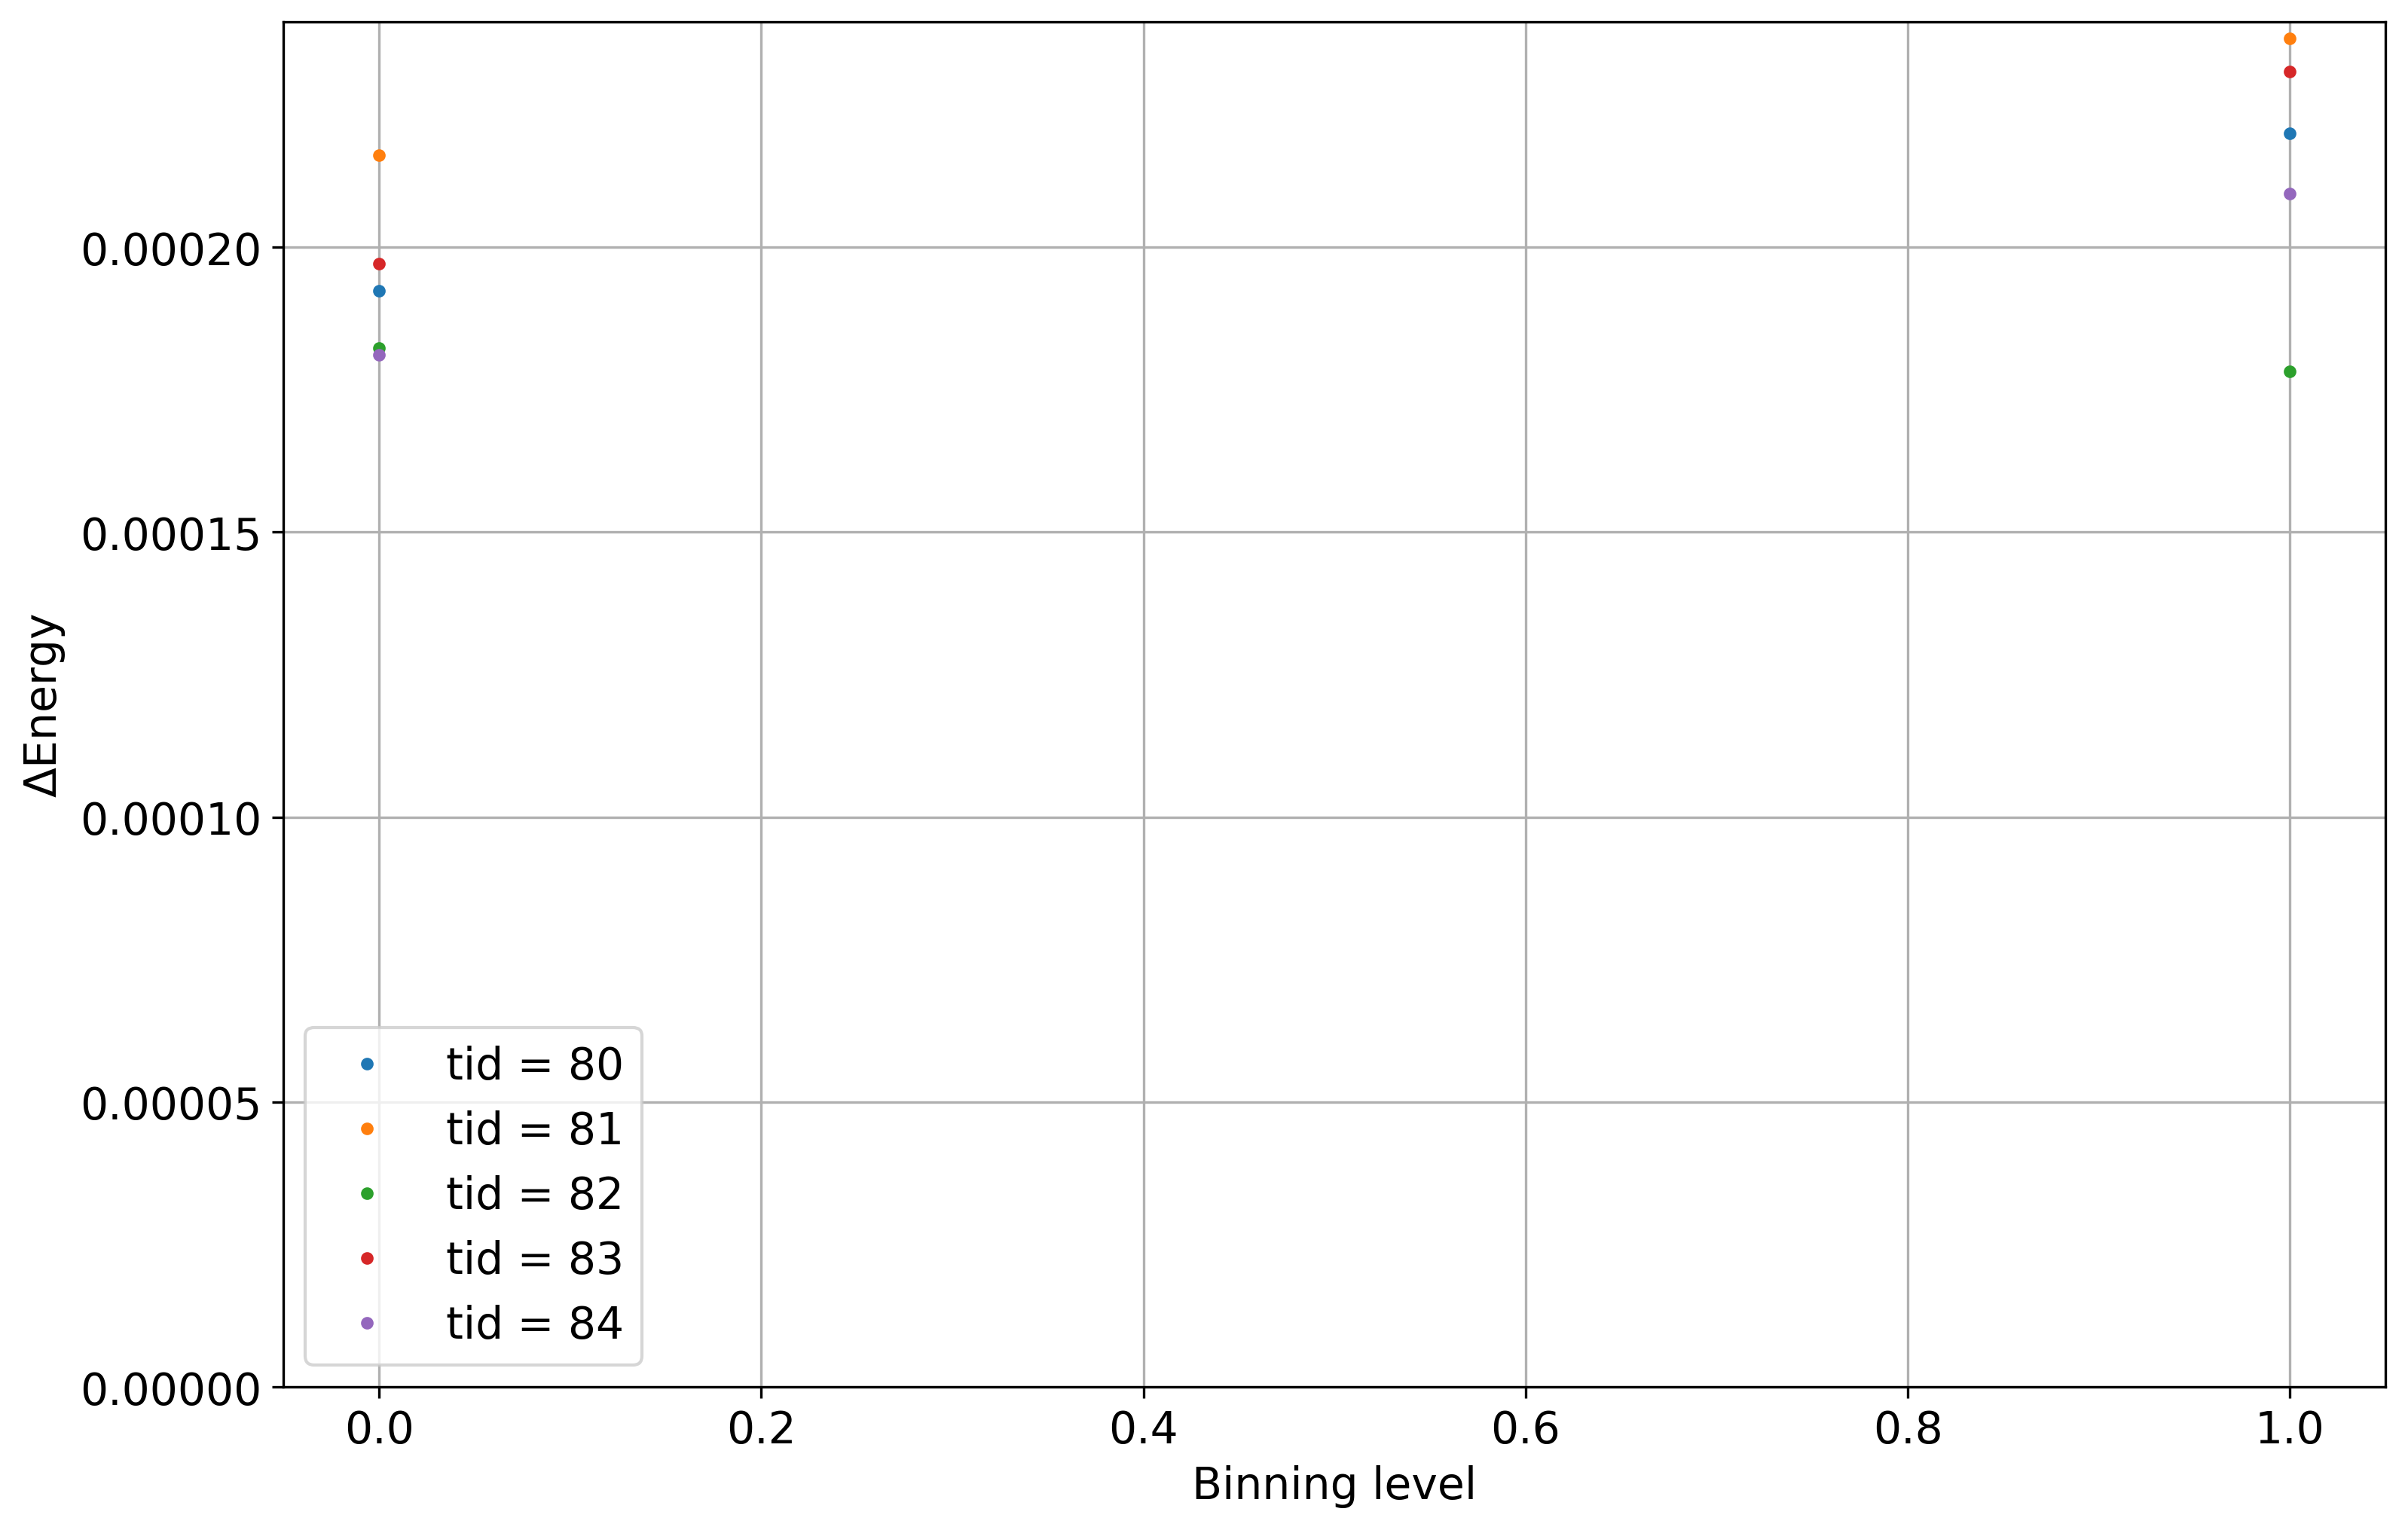

[-1.73333333]
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


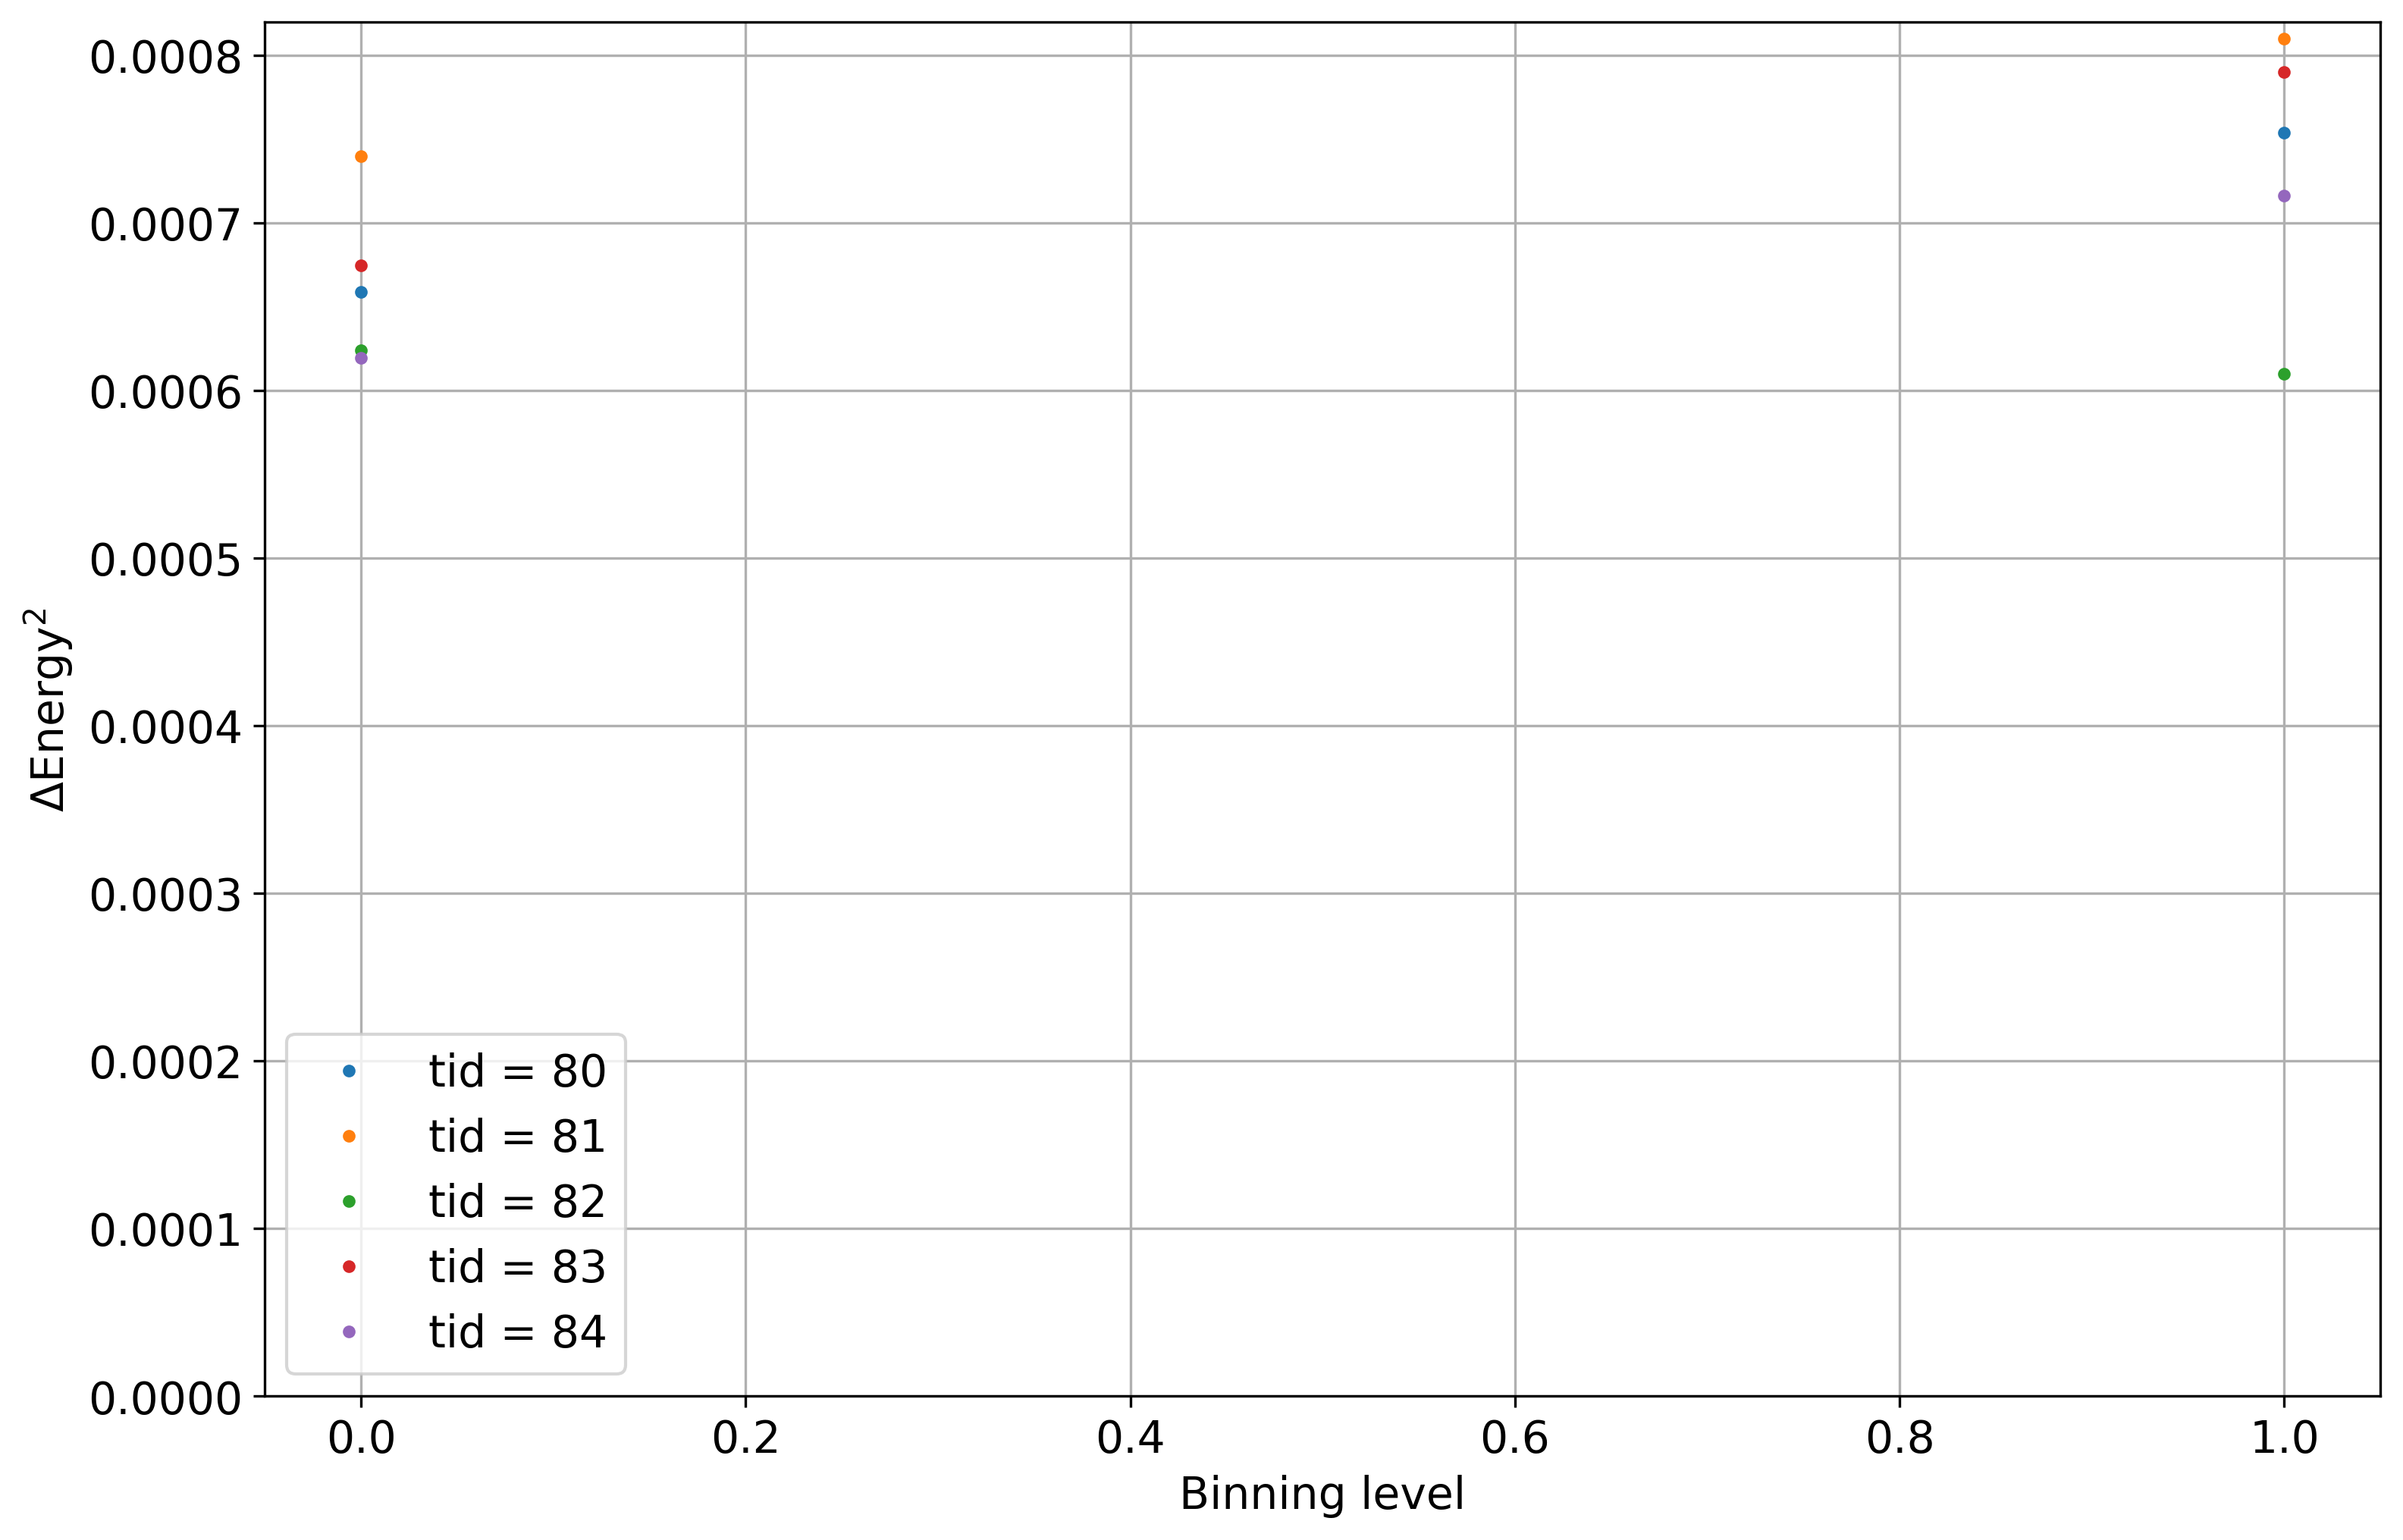

No jackknife analysis -- binning level:  2  -- number of bins:  8
(32, 2, 216, 1)
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:793: UserWarning: Negative variances num error: 2.030122E-15
  warnings.warn("Negative variances num error: %E" % err)


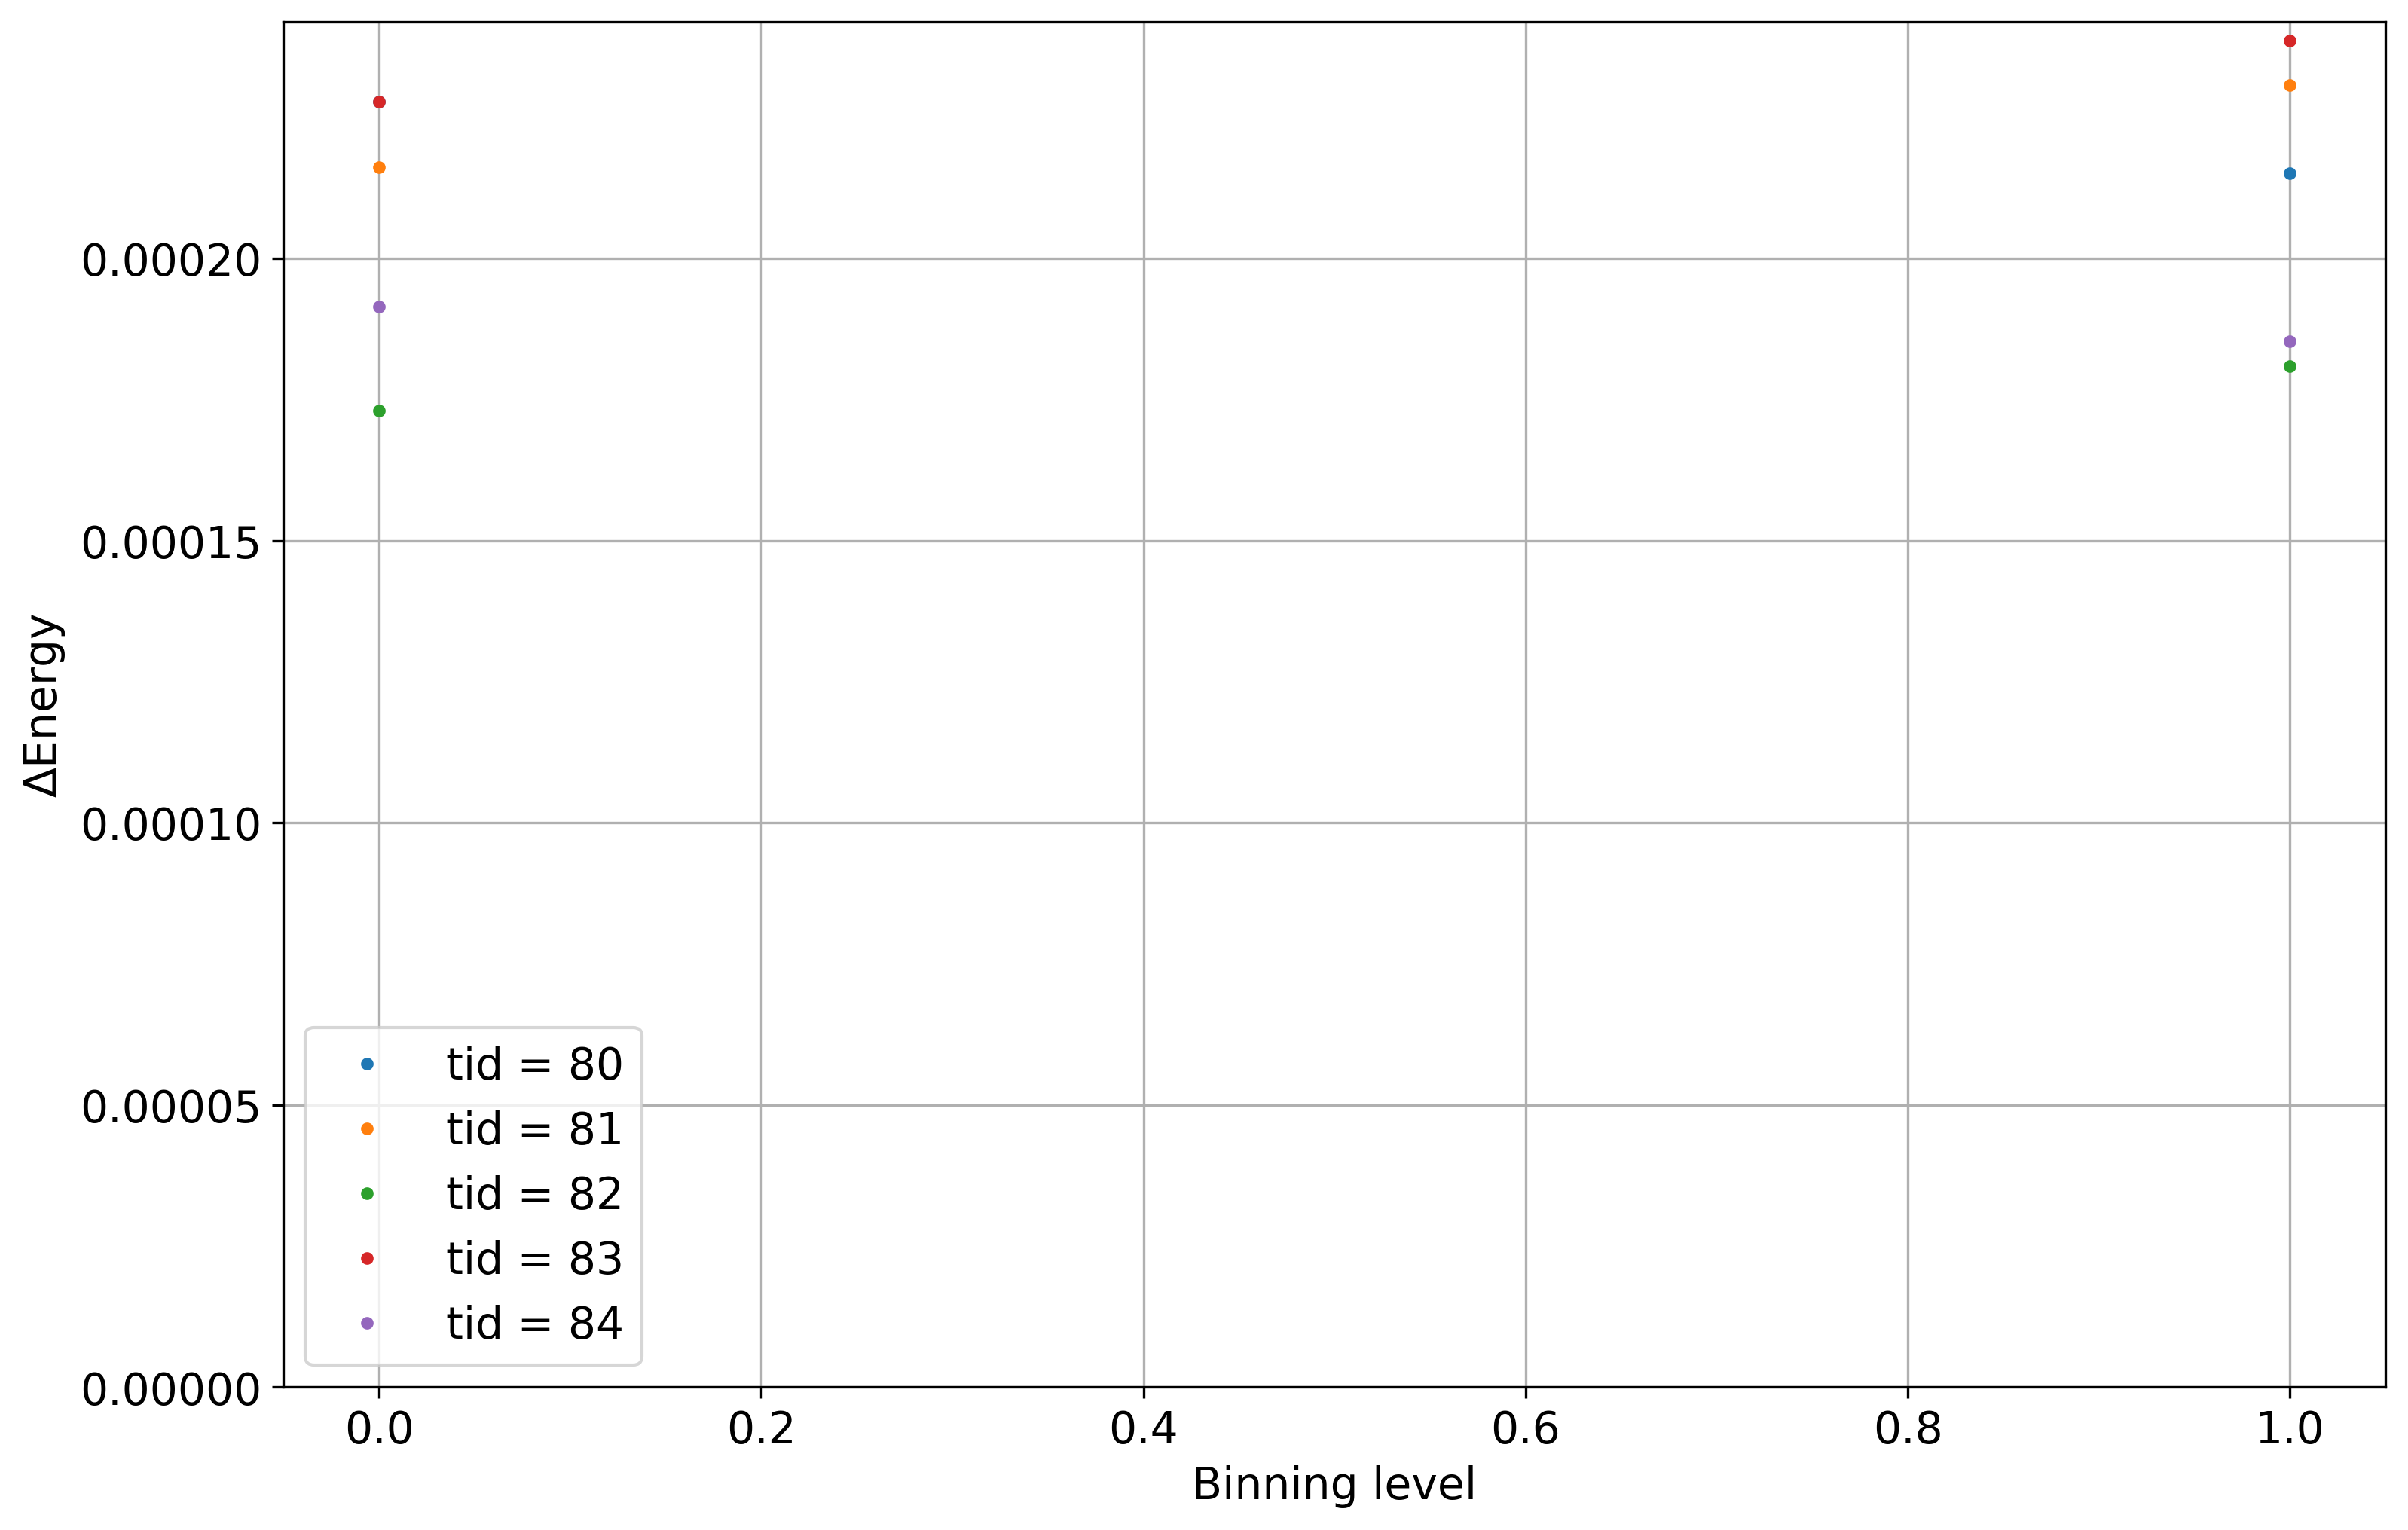

[-1.73333333]
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


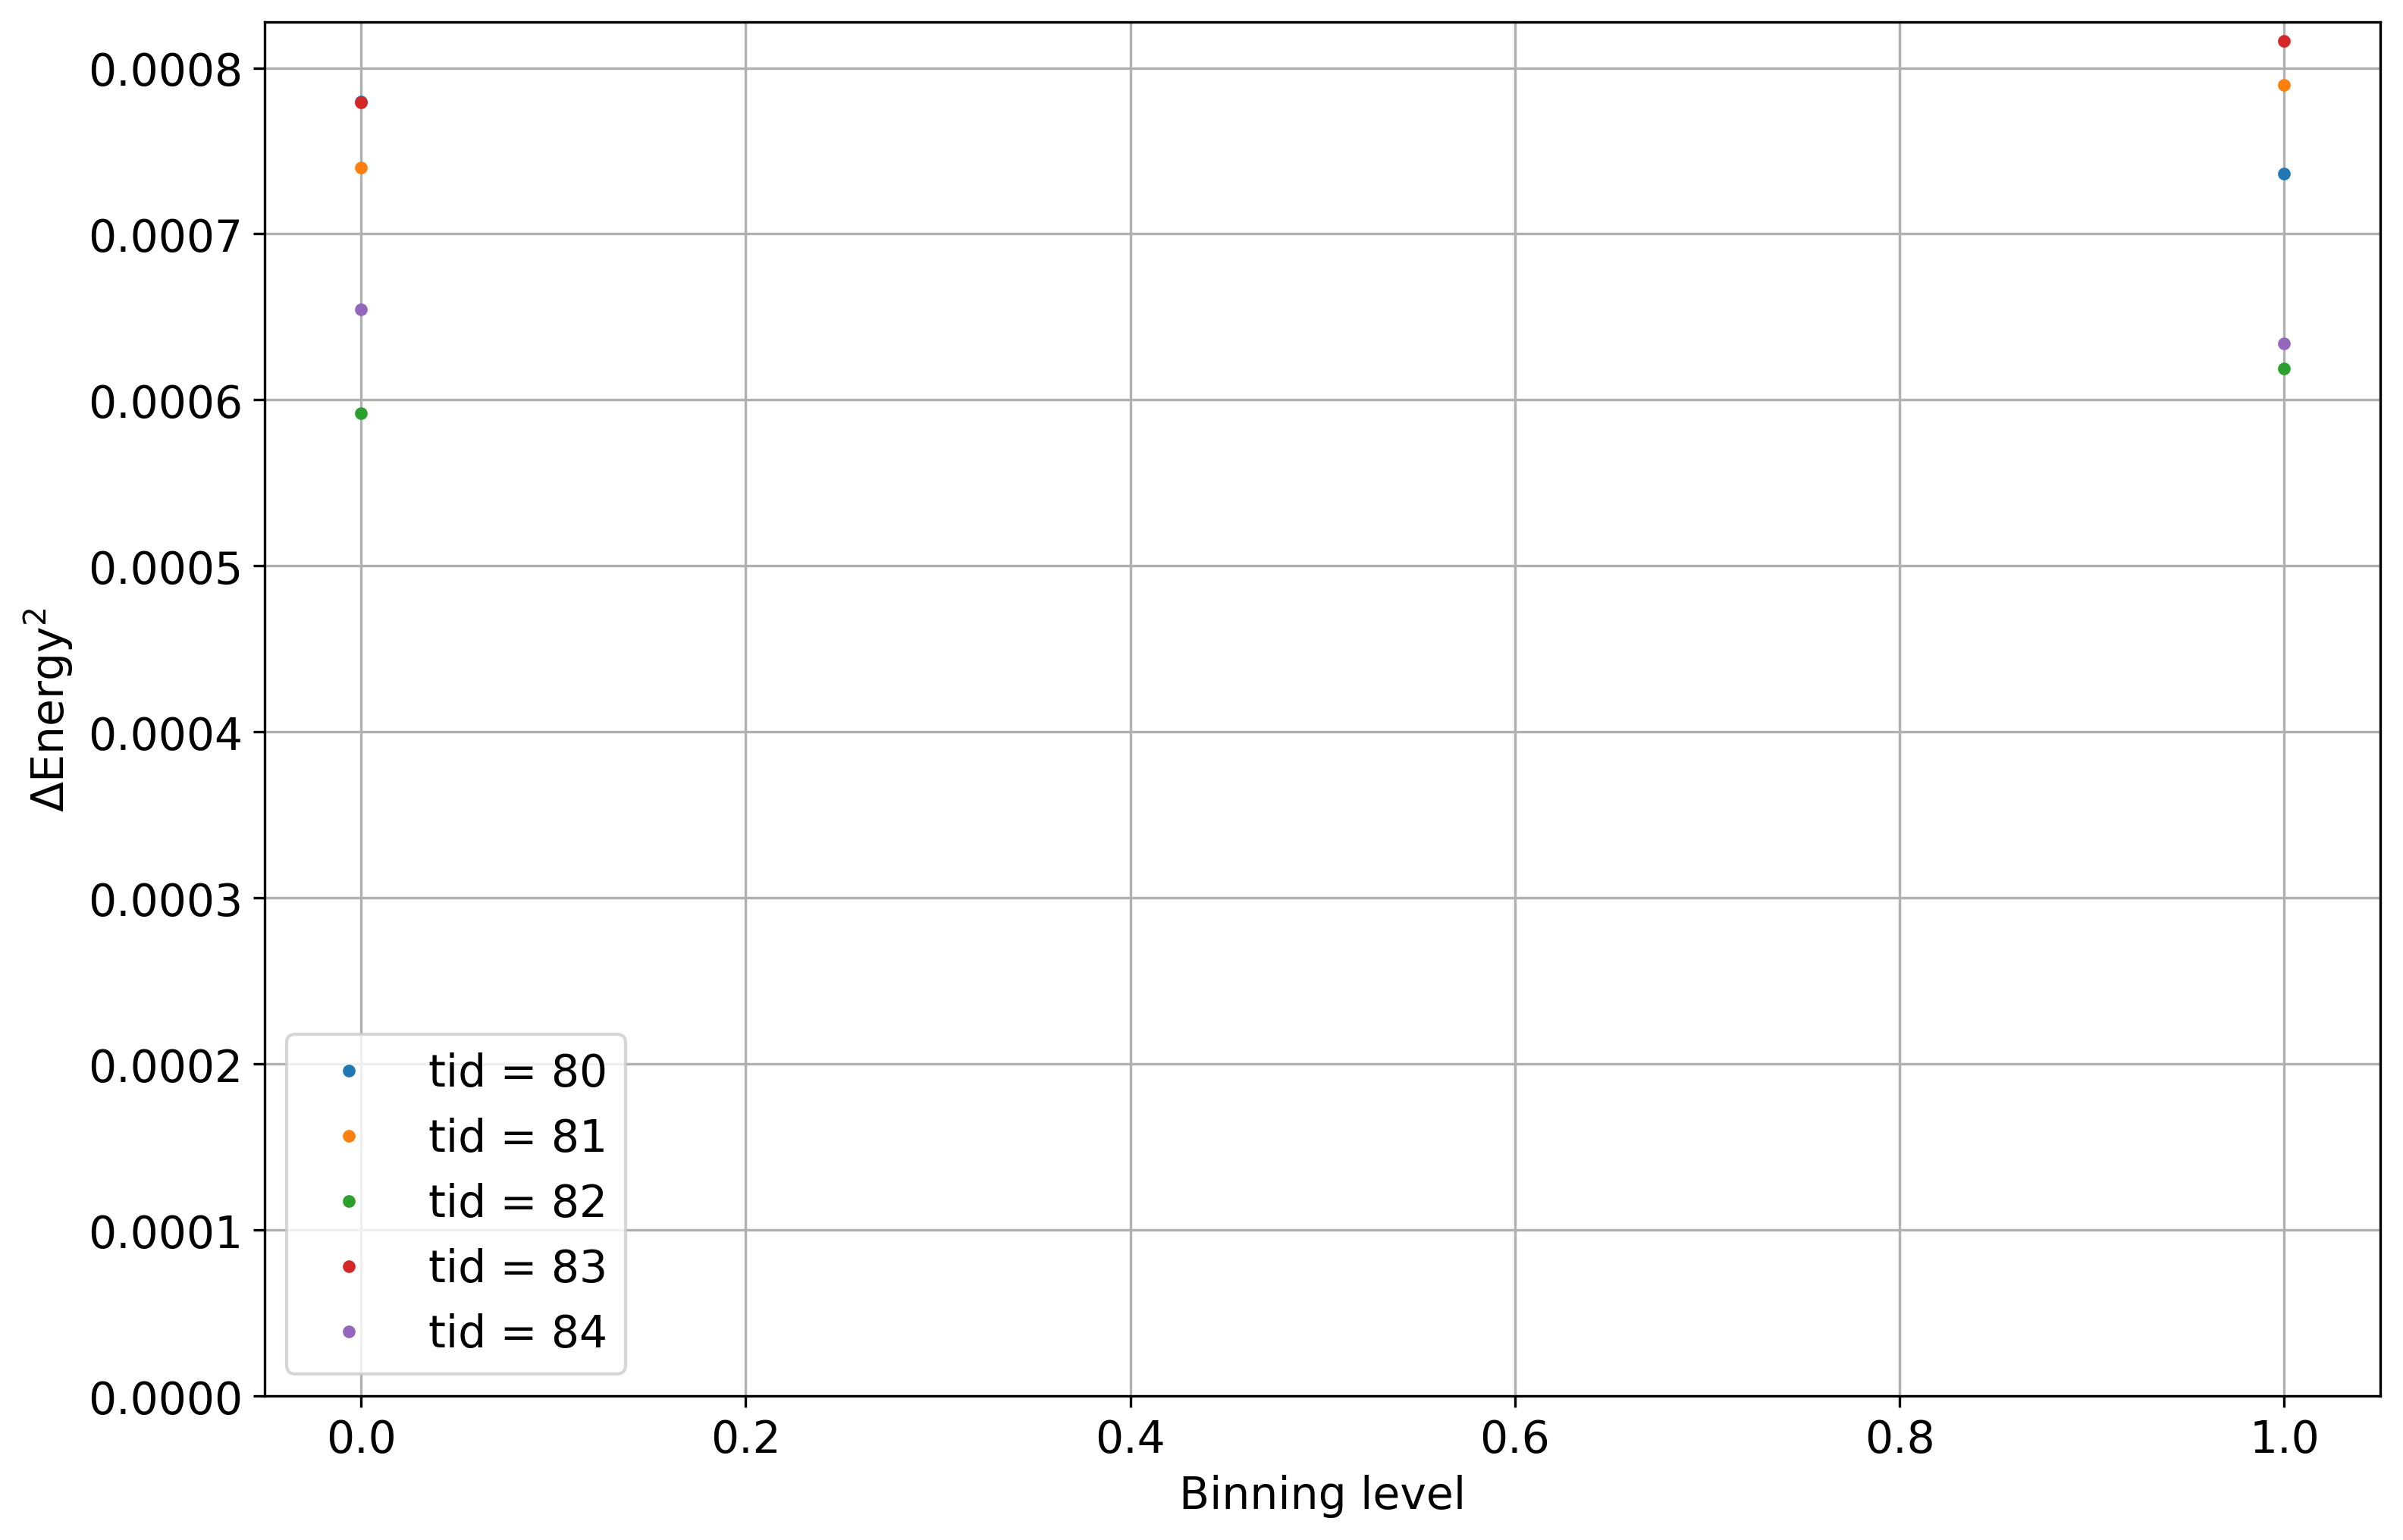

No jackknife analysis -- binning level:  2  -- number of bins:  8
(32, 2, 216, 1)
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:793: UserWarning: Negative variances num error: 2.537653E-15
  warnings.warn("Negative variances num error: %E" % err)


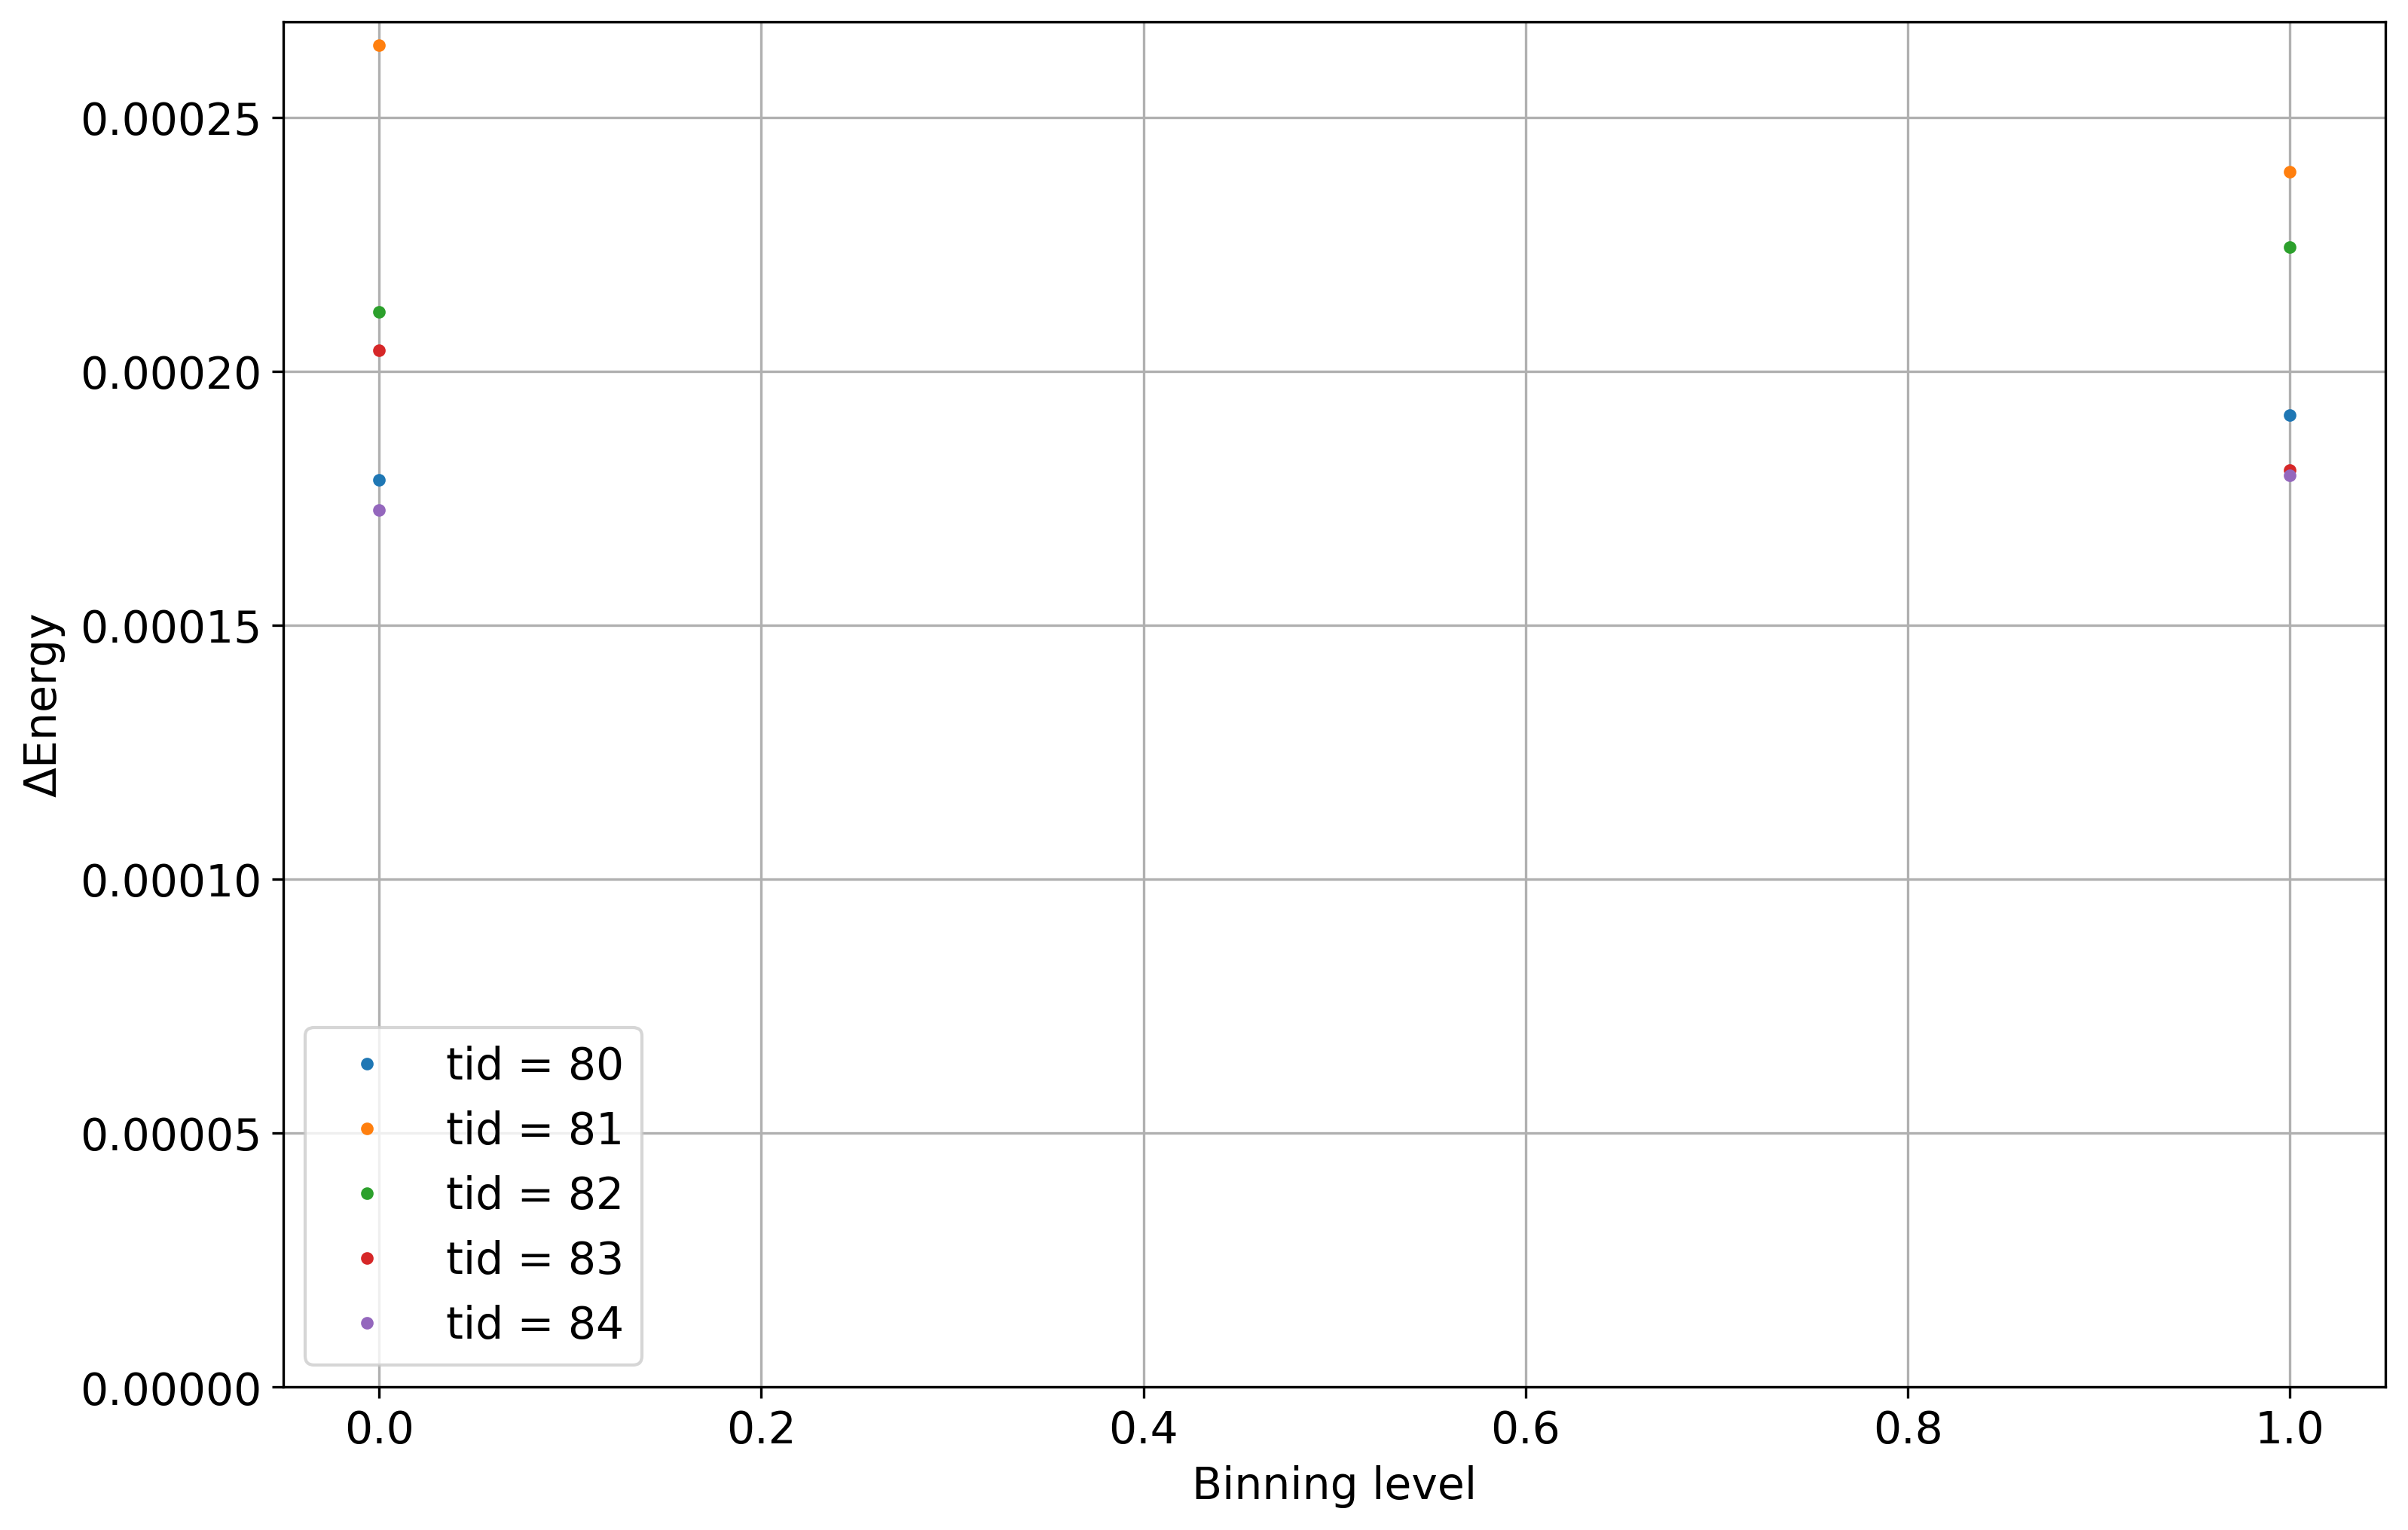

[-1.73333333]
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


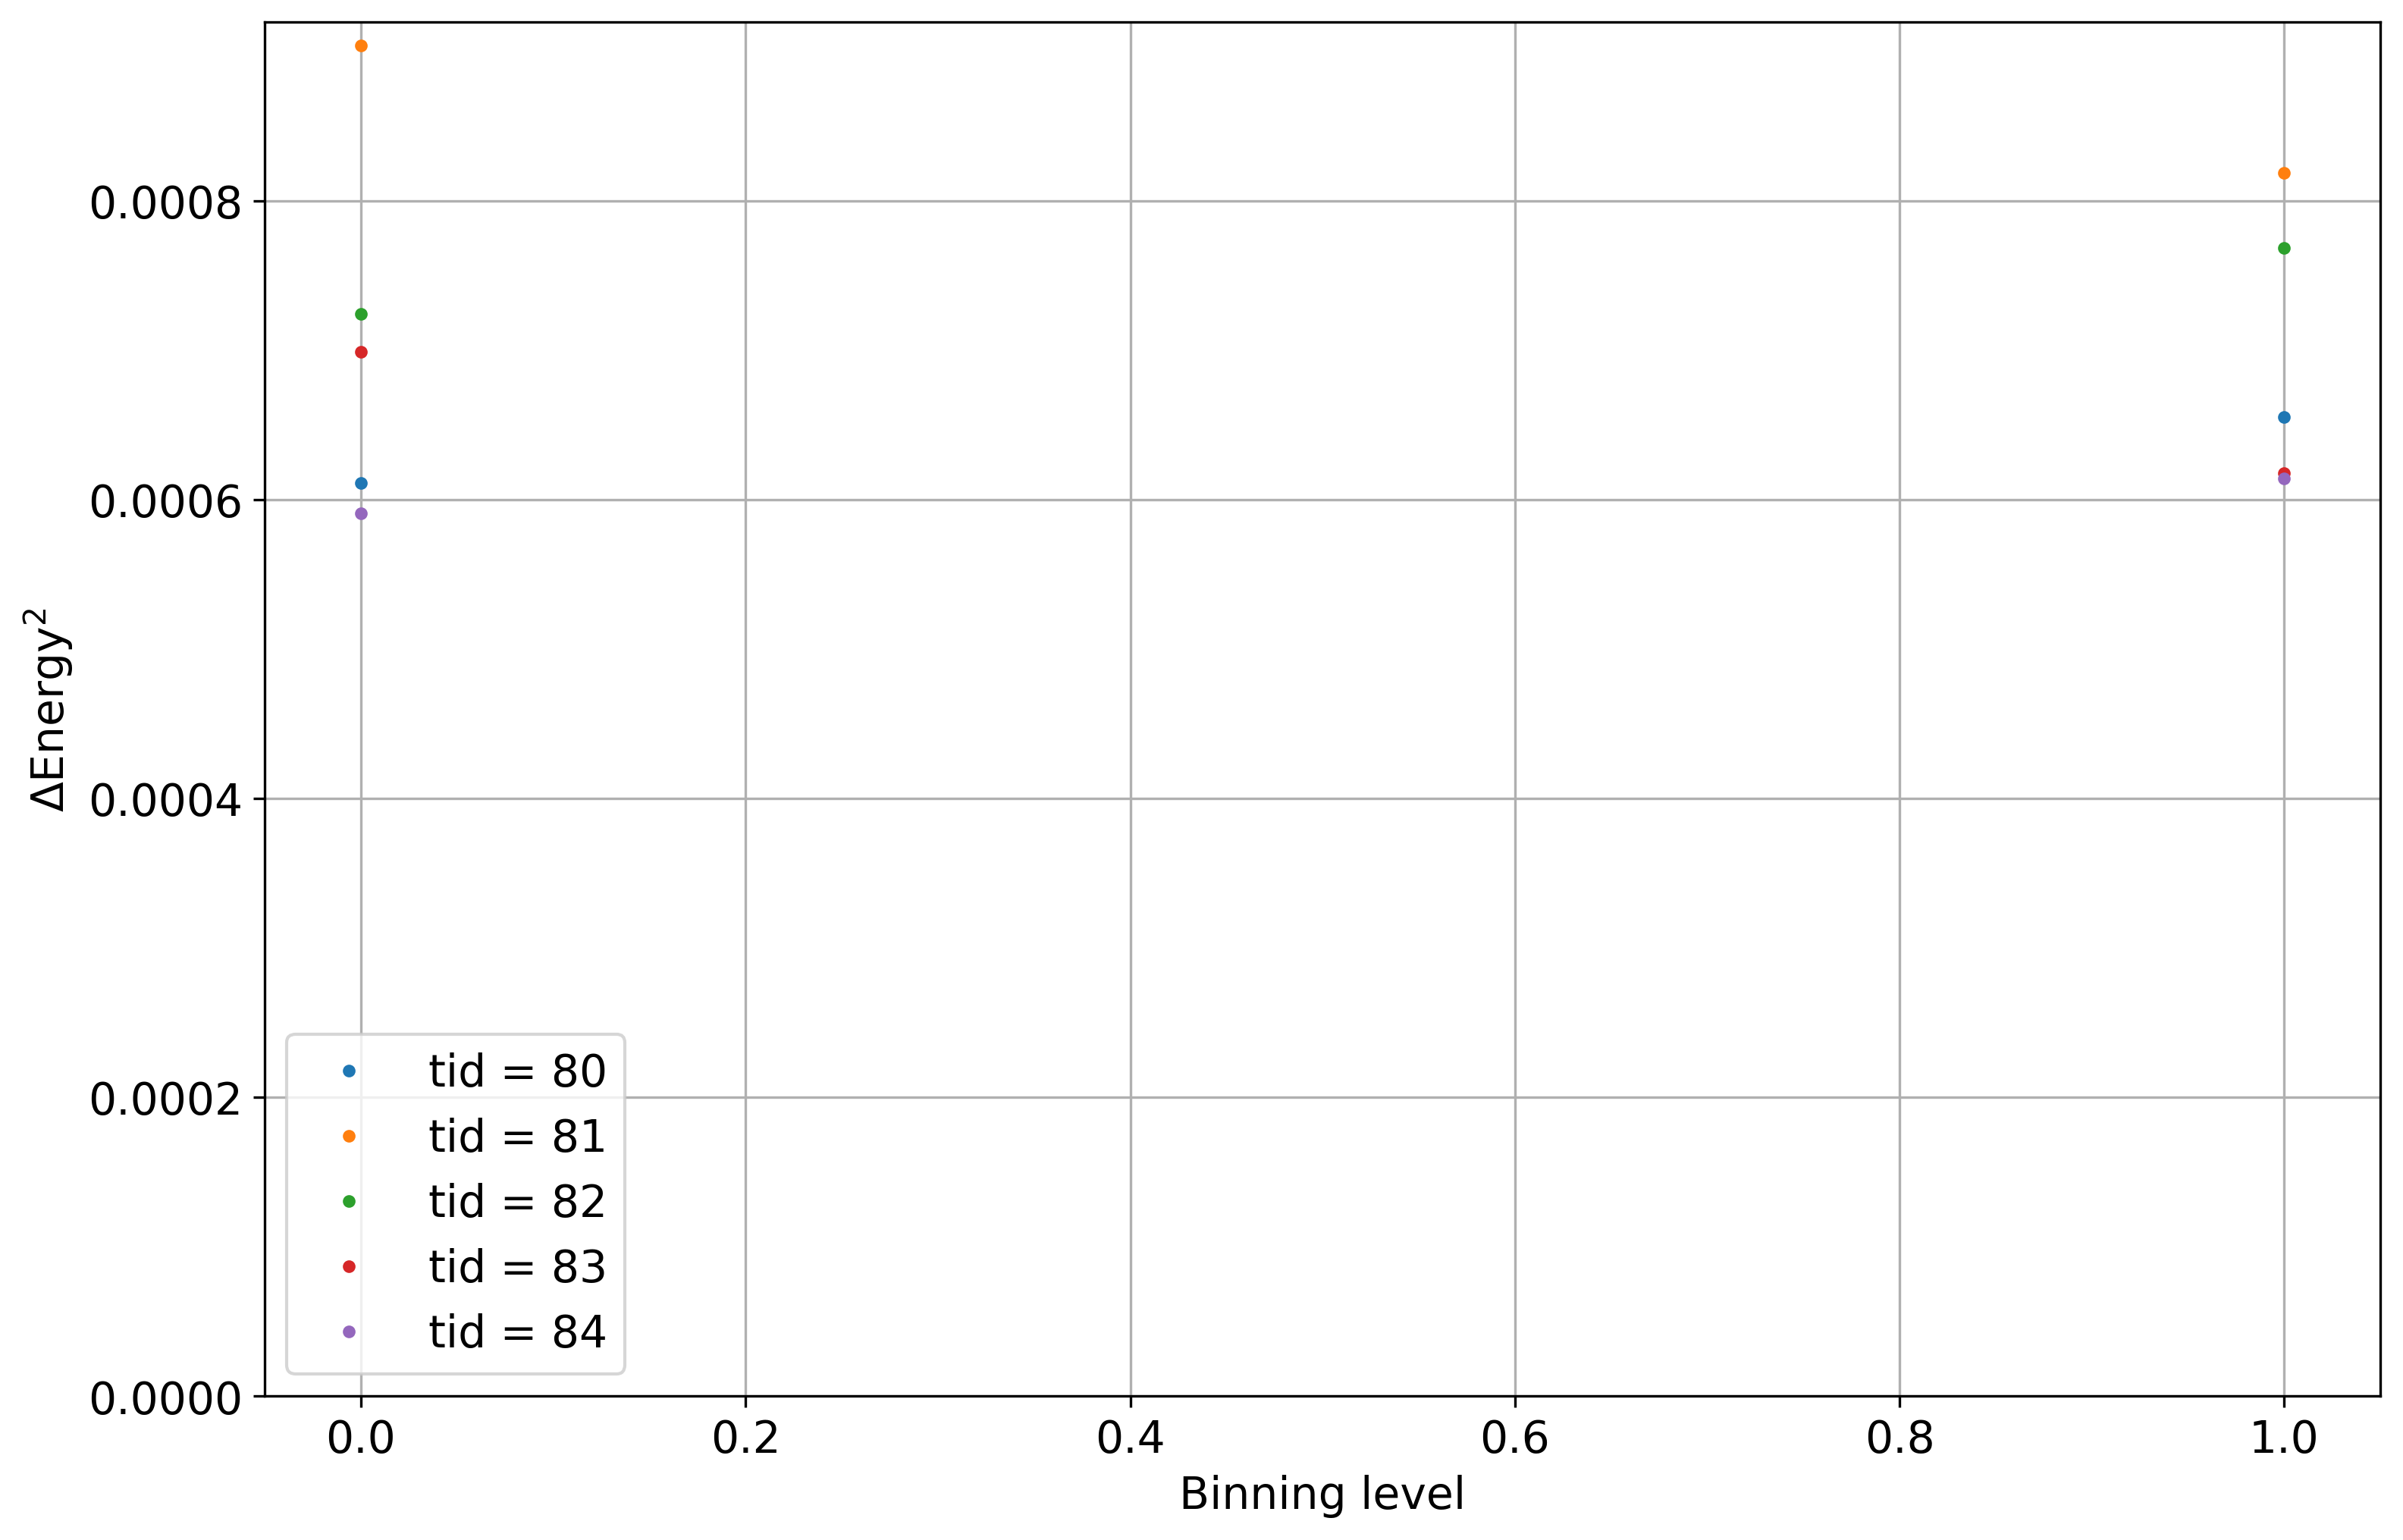

No jackknife analysis -- binning level:  2  -- number of bins:  8
(32, 2, 216, 1)
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:793: UserWarning: Negative variances num error: 1.522592E-15
  warnings.warn("Negative variances num error: %E" % err)


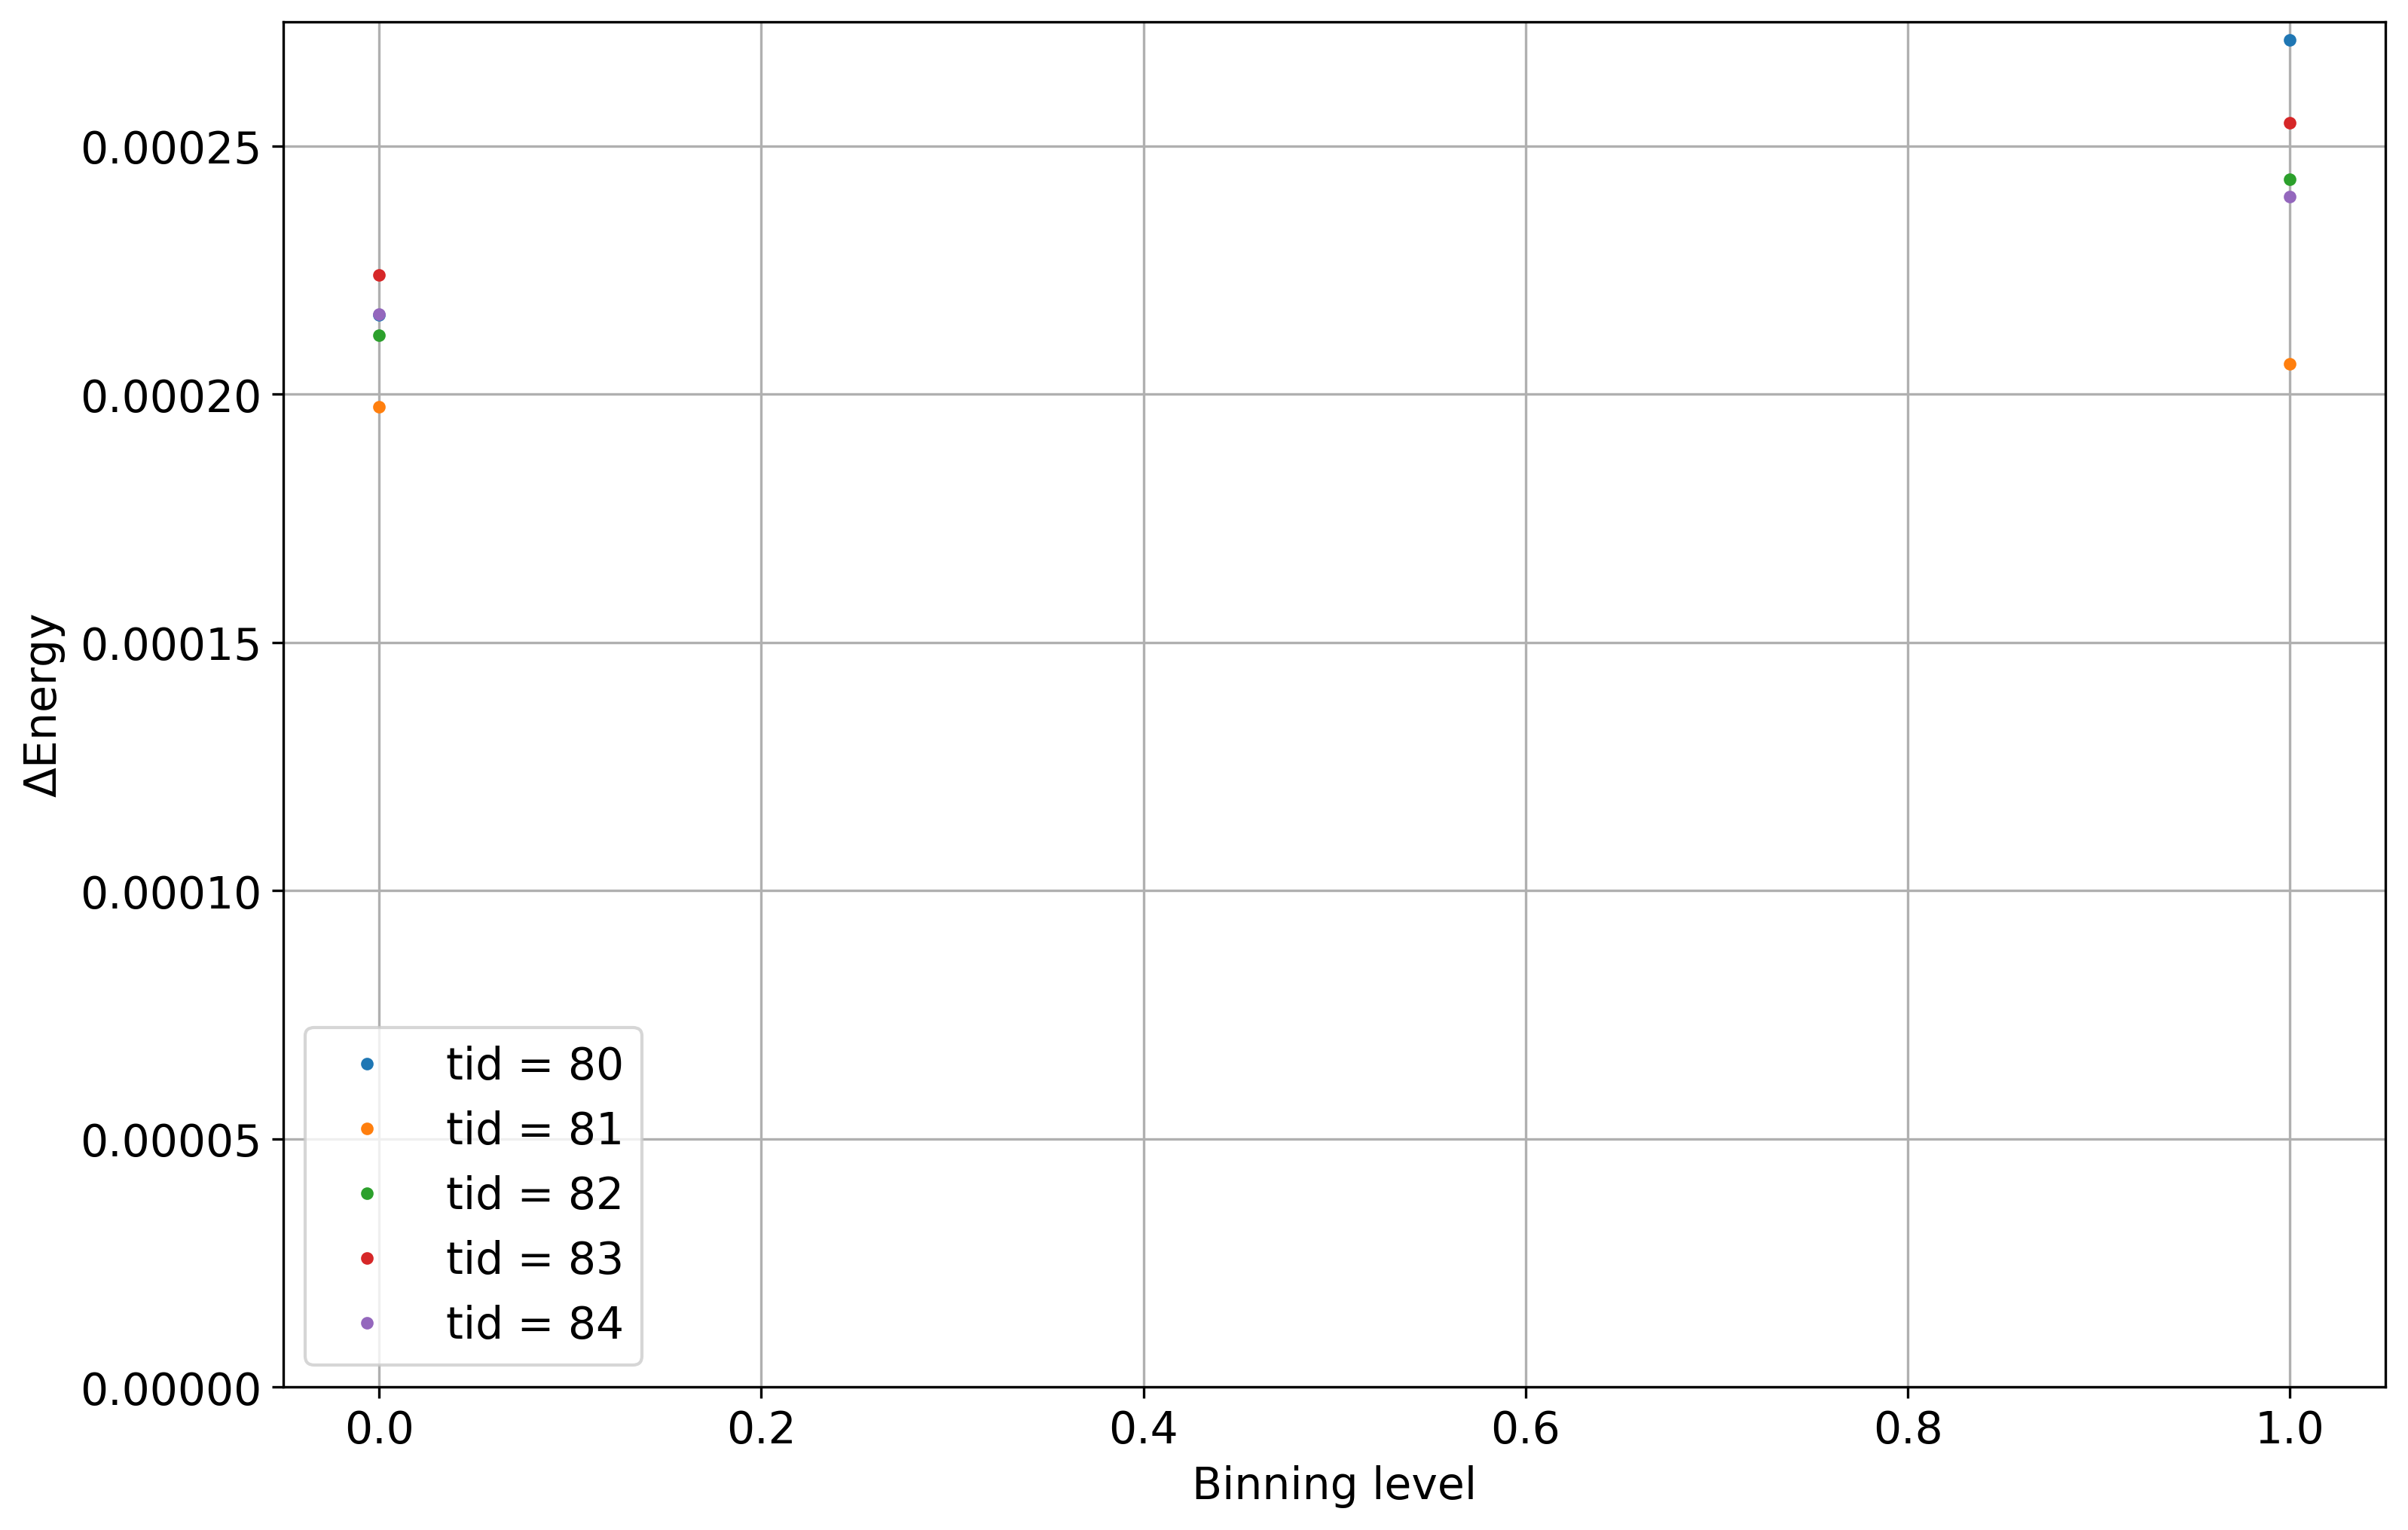

[-1.73333333]
Binning...Energy
 bins list for binning:  [32, 16]
(32, 216, 1)
(32, 216, 1)
(16, 216, 1)
plotting!


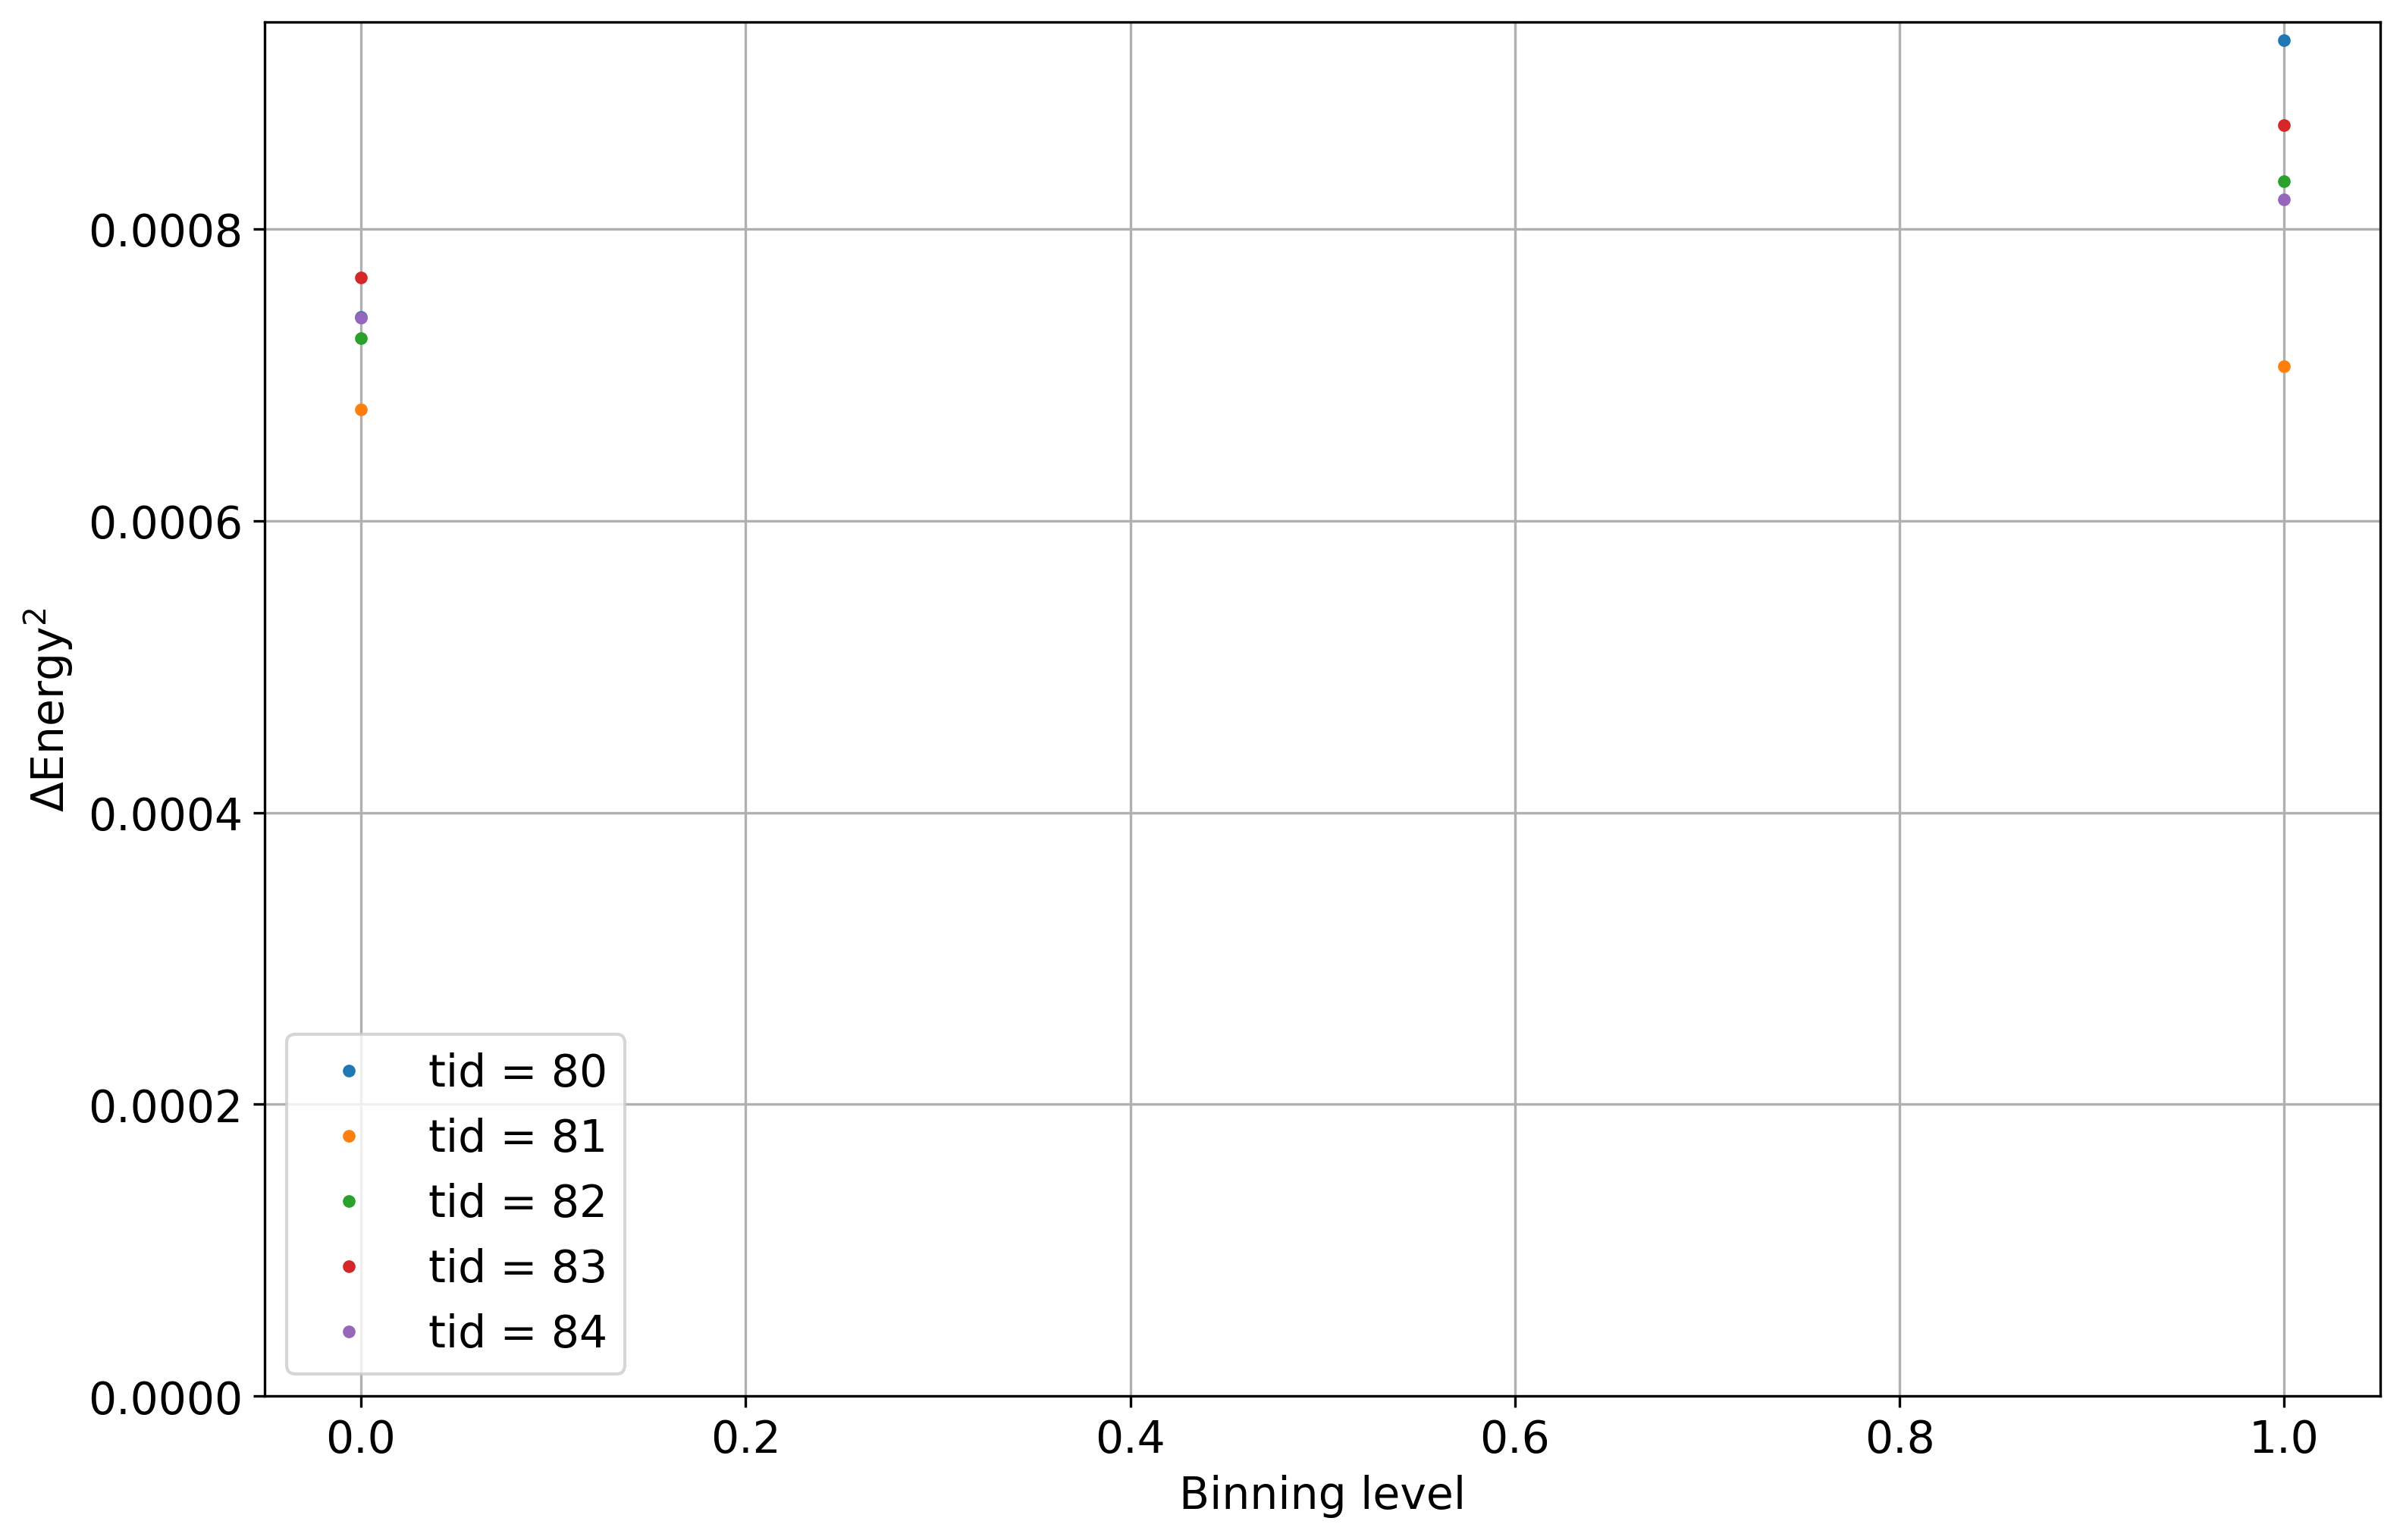

No jackknife analysis -- binning level:  2  -- number of bins:  8
(32, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:793: UserWarning: Negative variances num error: 3.552714E-15
  warnings.warn("Negative variances num error: %E" % err)


In [9]:
kw = {'binning':True, 'plzplot': True, 'minbin':16, 'RS':True, 
      'S0':np.log(2), 'mergeruns':mergeruns, 'pairruns':pairruns, 'nb_drop':nb_drop,
     'plotmin':80, 'plotmax':85, 'binning_level':2, 'jackknife': False}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, t_h_VarE, t_h_ErrVarE, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax, MergedData ] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)


if mergeruns:
    [t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, t_h_VarE, t_h_ErrVarE, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax] = MergedData

In [10]:
#t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi = \
# af.LoadMagnetisation(foldername, filenamelist, numsites, nb,
#                      stat_temps, temperatures, listfunctions, **kw)

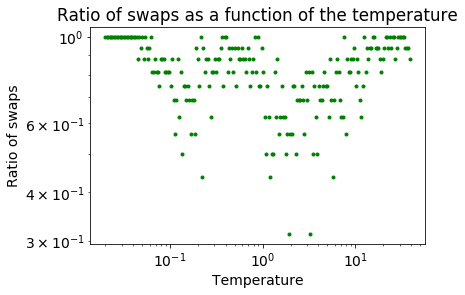

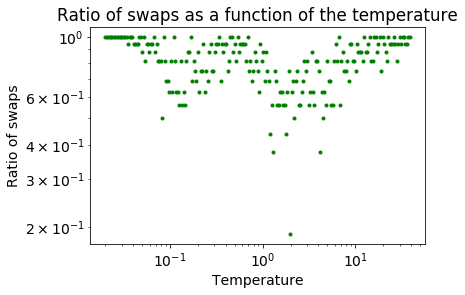

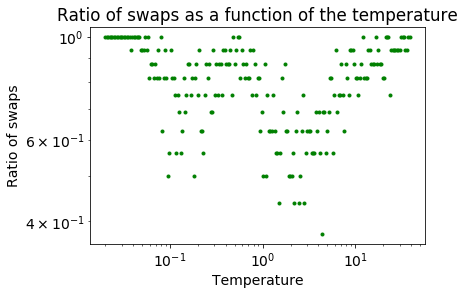

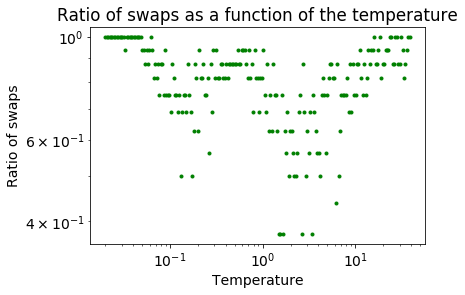

In [11]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

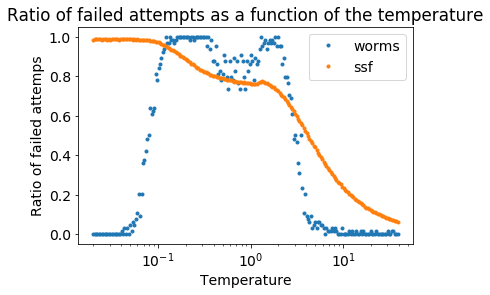

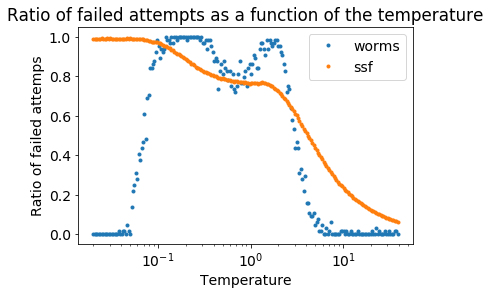

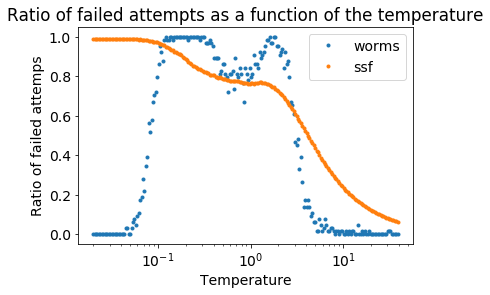

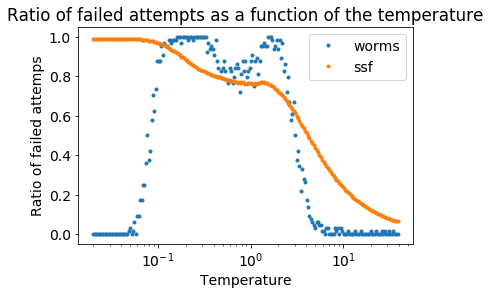

In [12]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [13]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [14]:
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
S0 = np.log(2)
kw = {'gscheck': True, 'S0': S0, 'RS': True, 't_h_EntropyData': (t_h_S, t_h_Smin, t_h_Smax) }

print(t_h_Smin[0][0:5,0])
print(t_h_S[0][0:5,0])
print(t_h_Smax[0][0:5,0])

[-0.04883076 -0.04883076 -0.04883076 -0.04883076 -0.04883076]
[0.05377141 0.05377141 0.05377141 0.05377141 0.05377141]
[0.15637358 0.15637358 0.15637358 0.15637358 0.15637358]


In [15]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

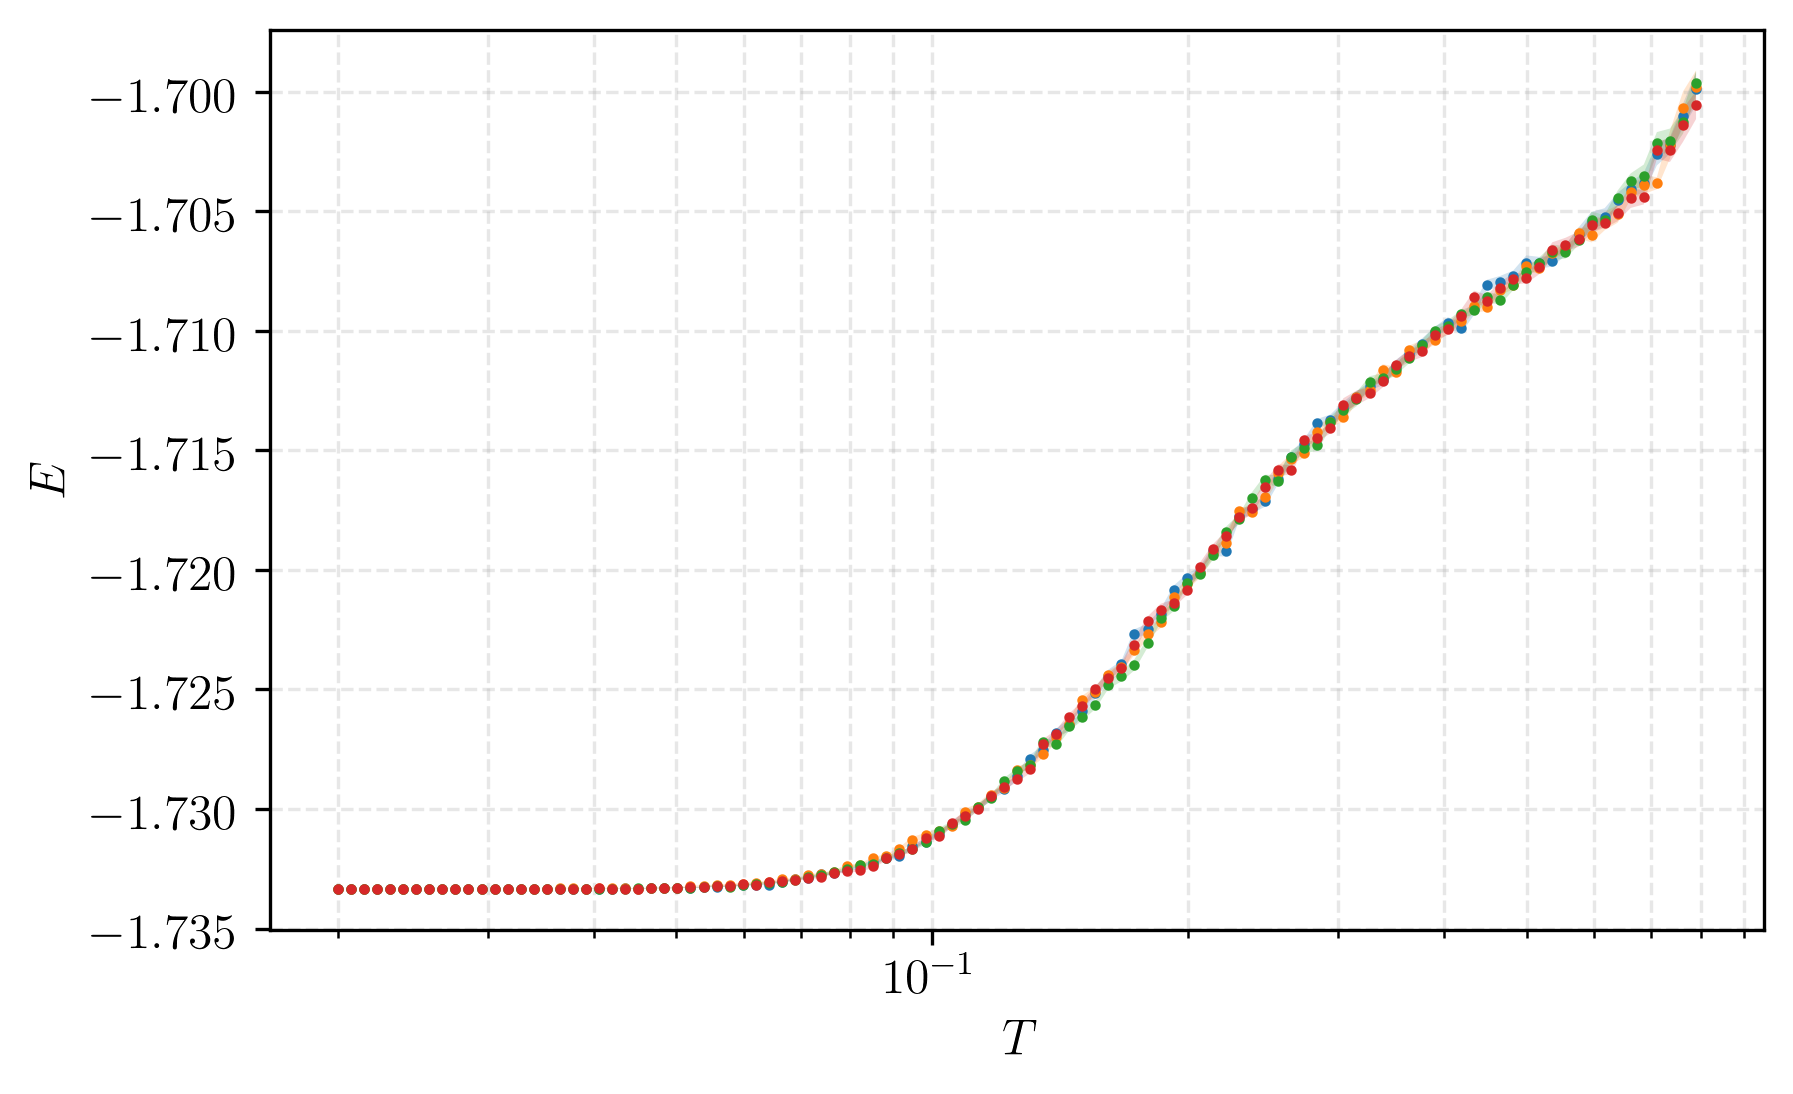

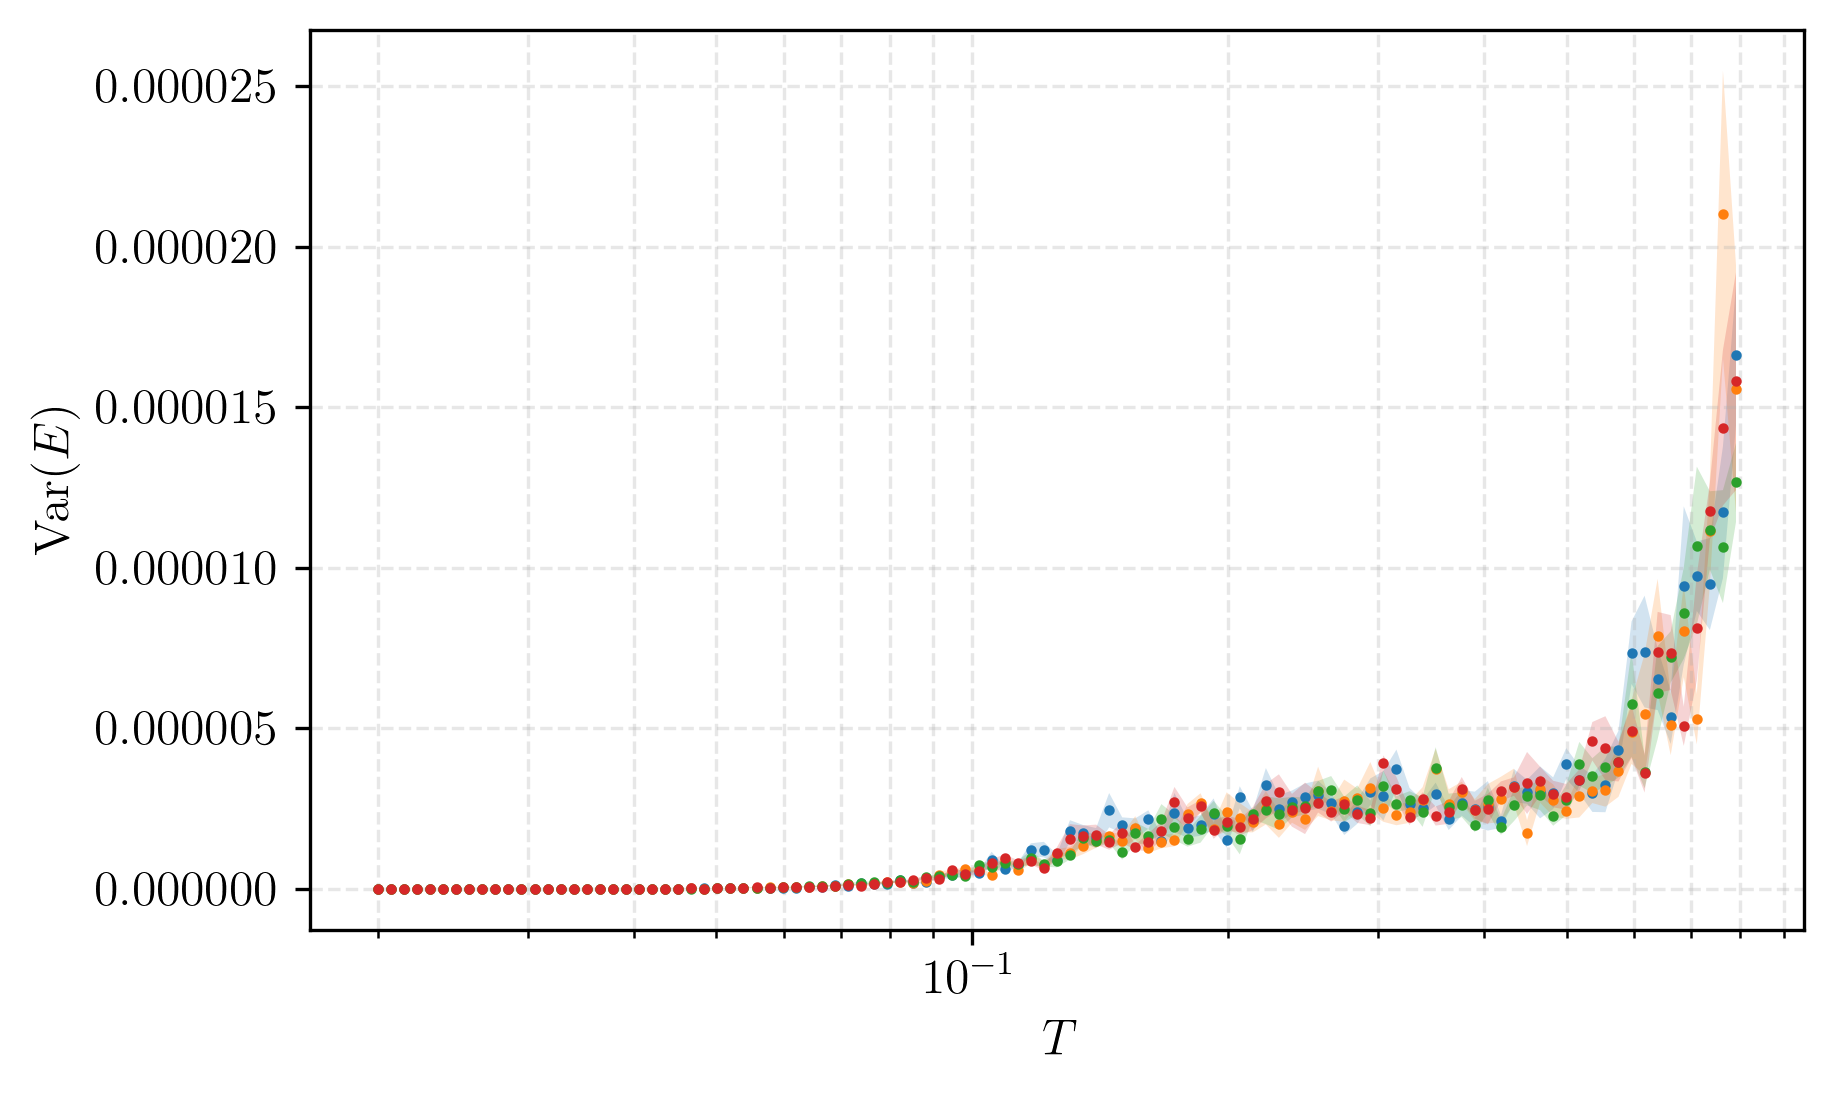

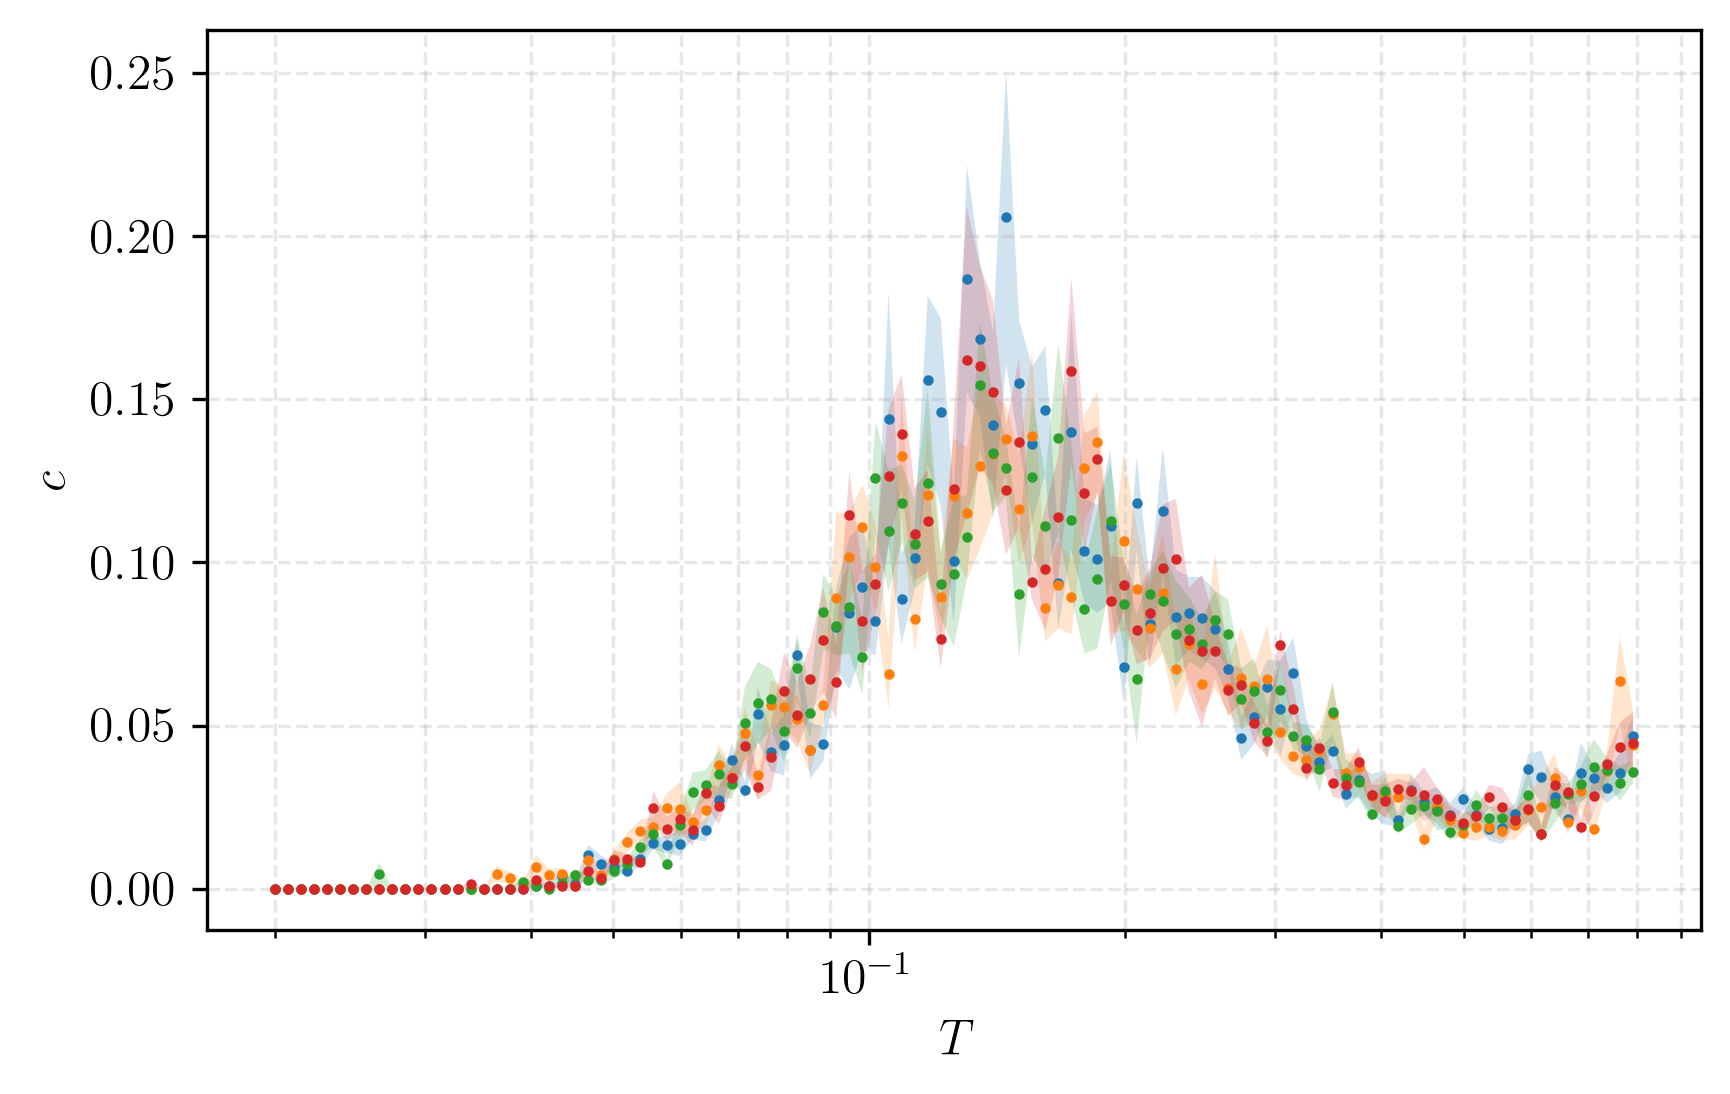

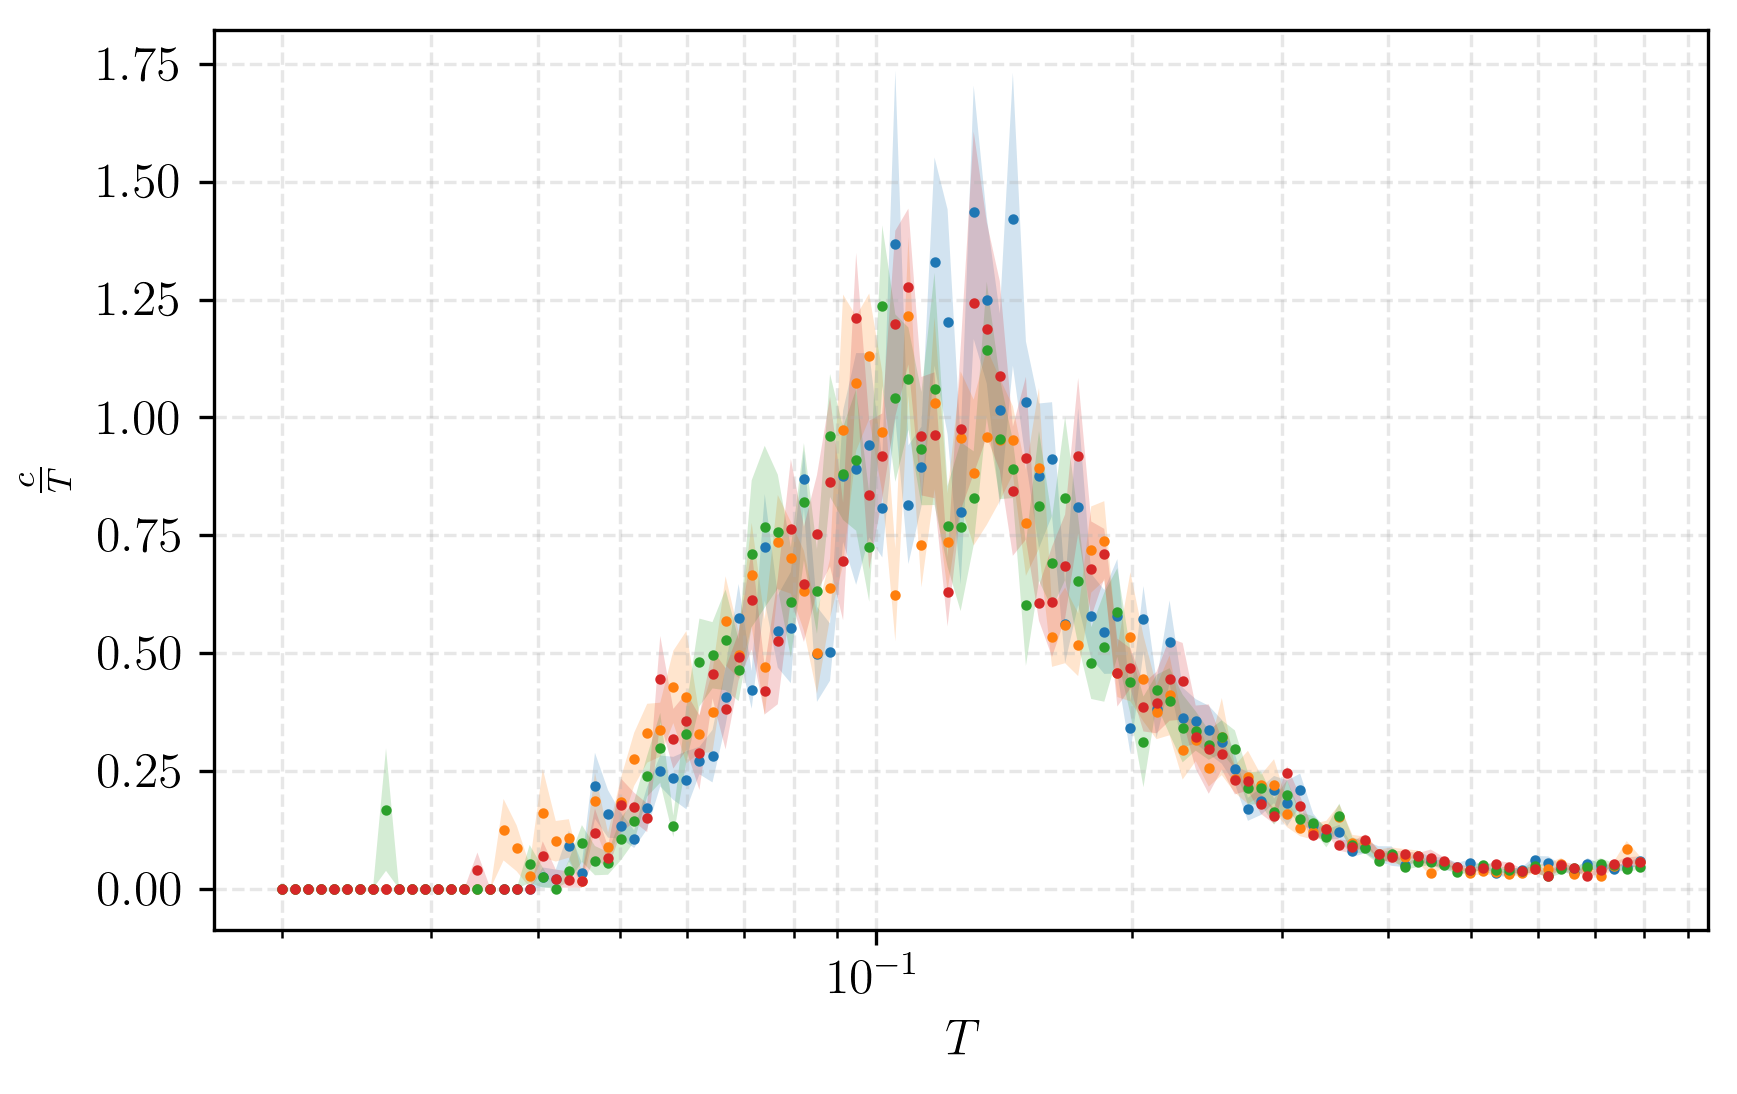

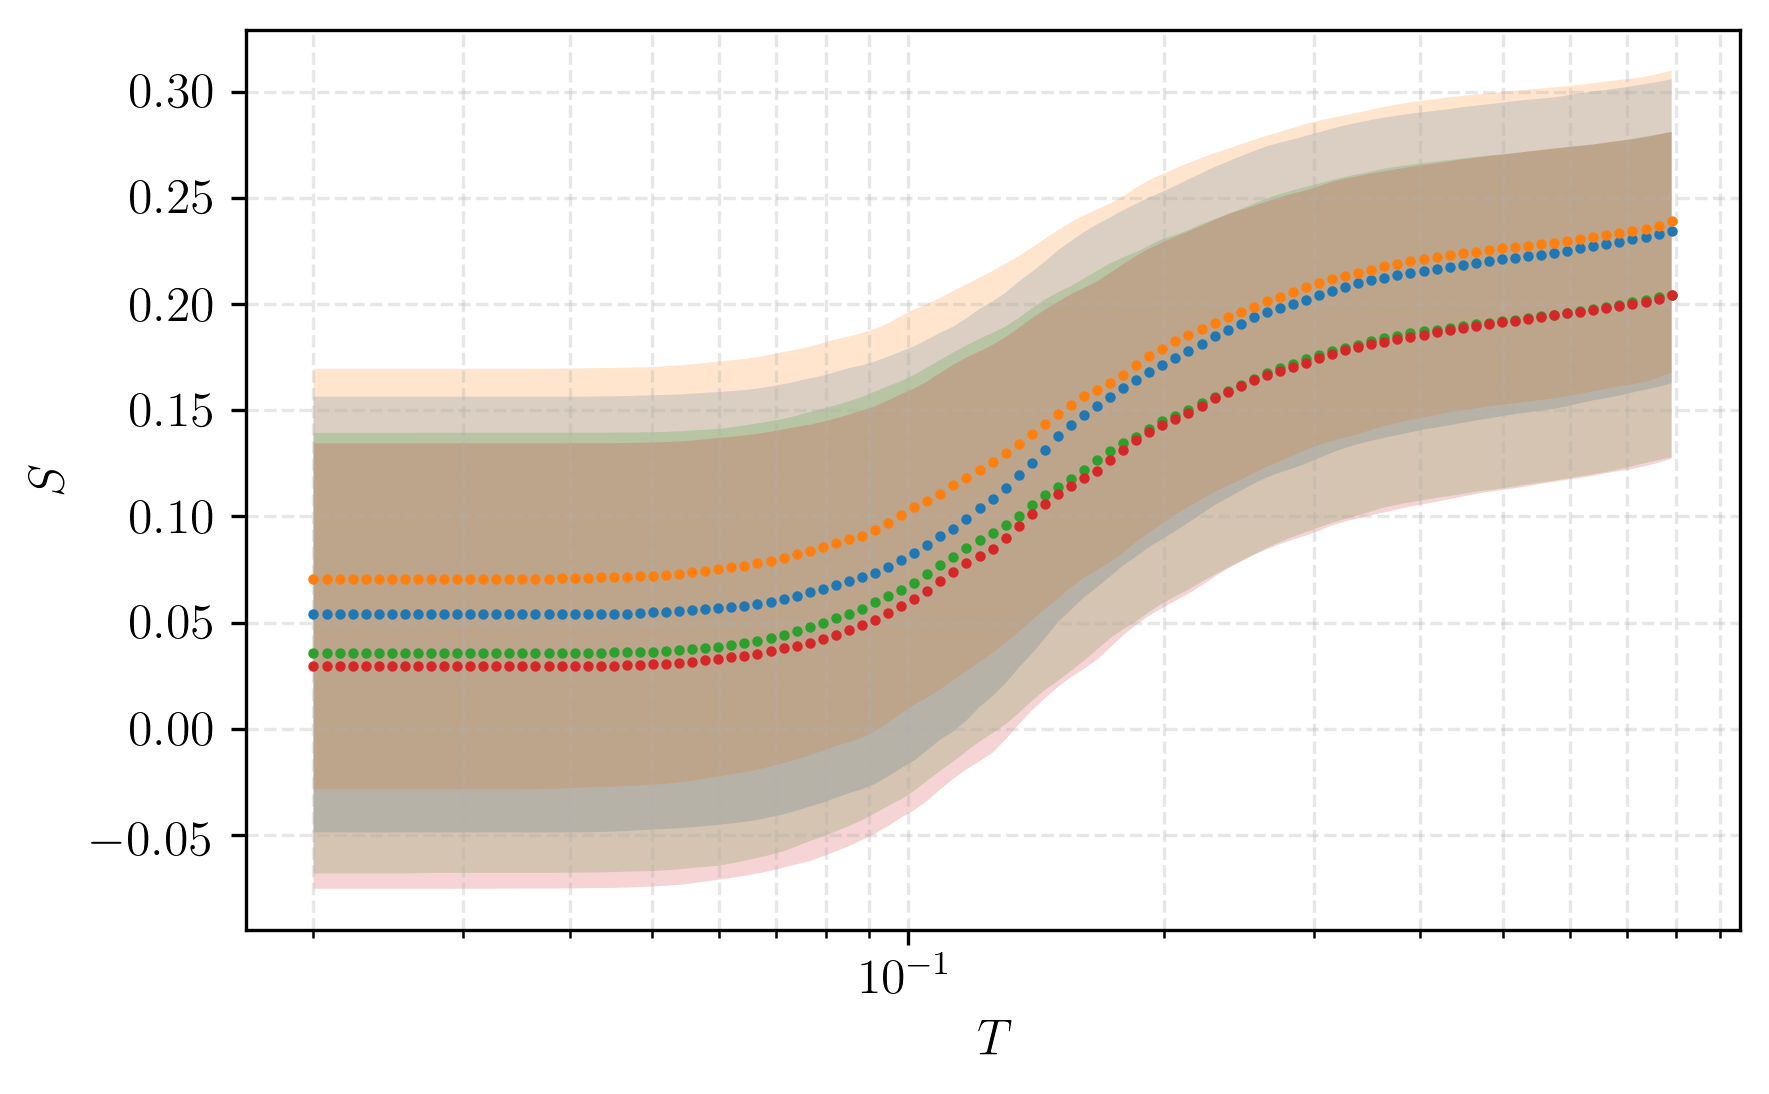

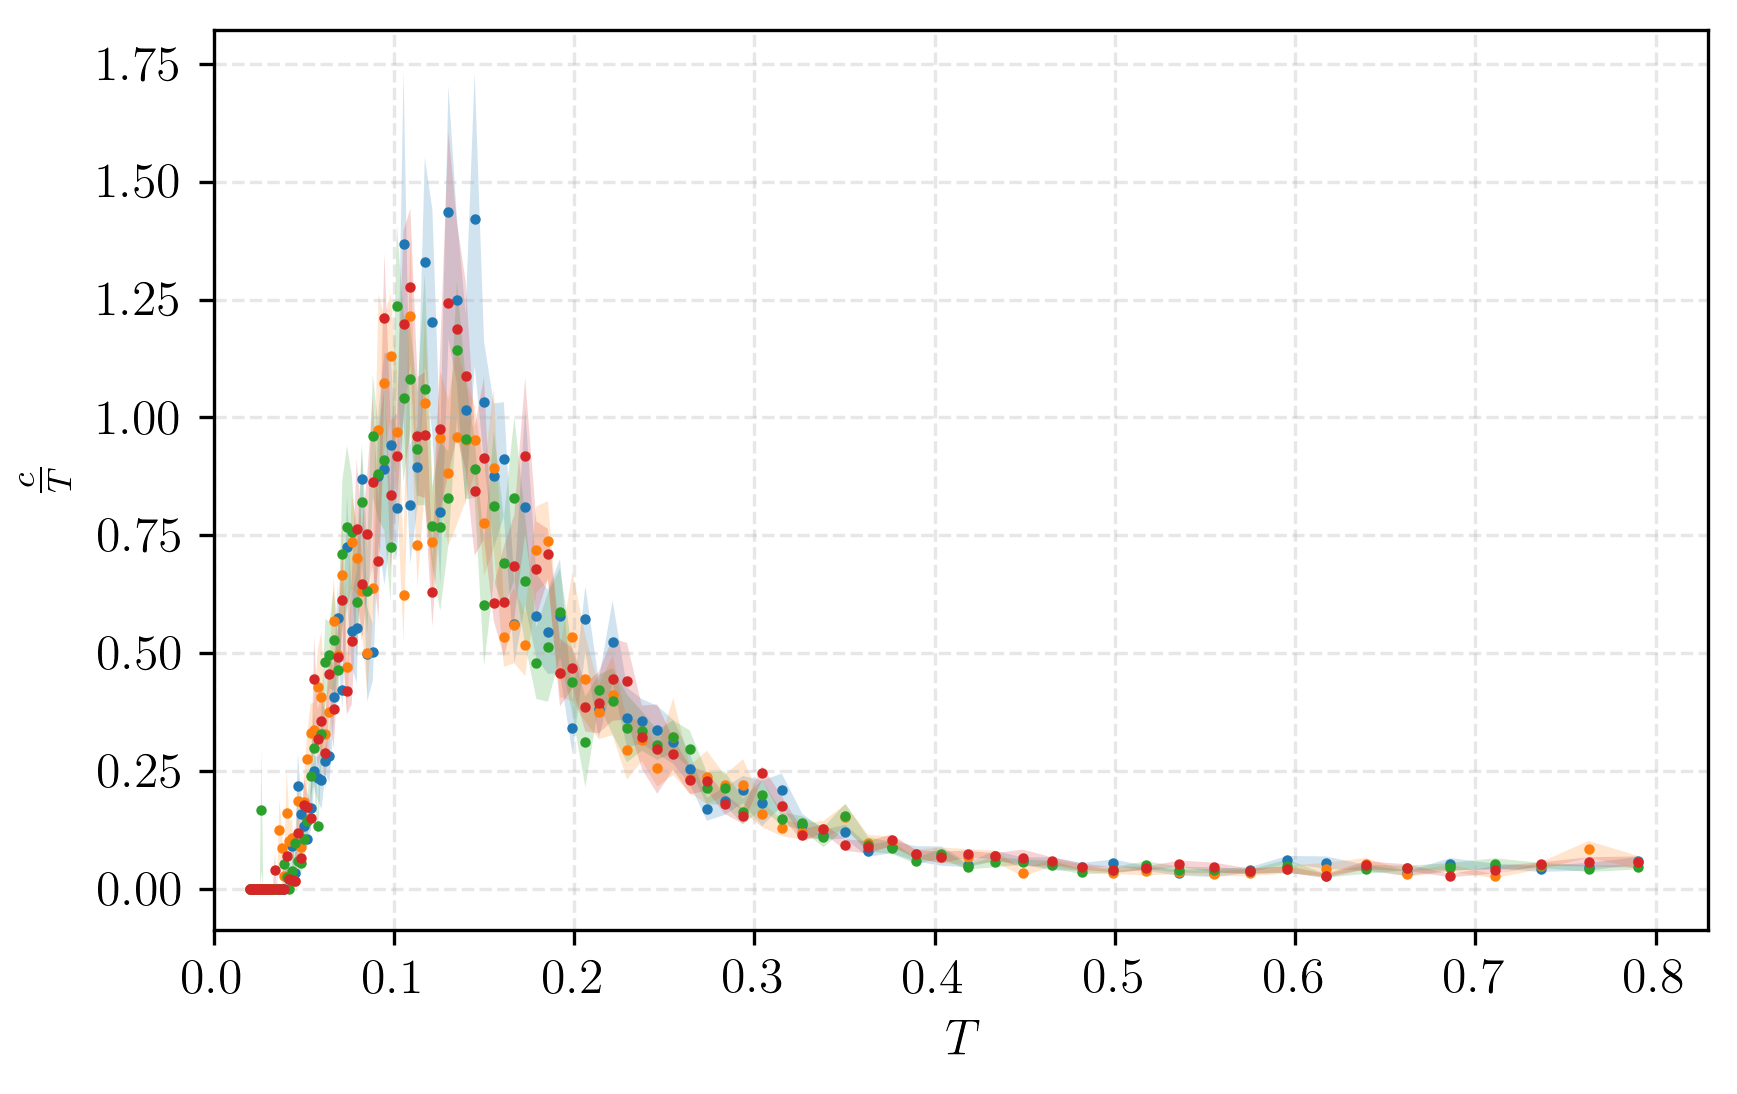

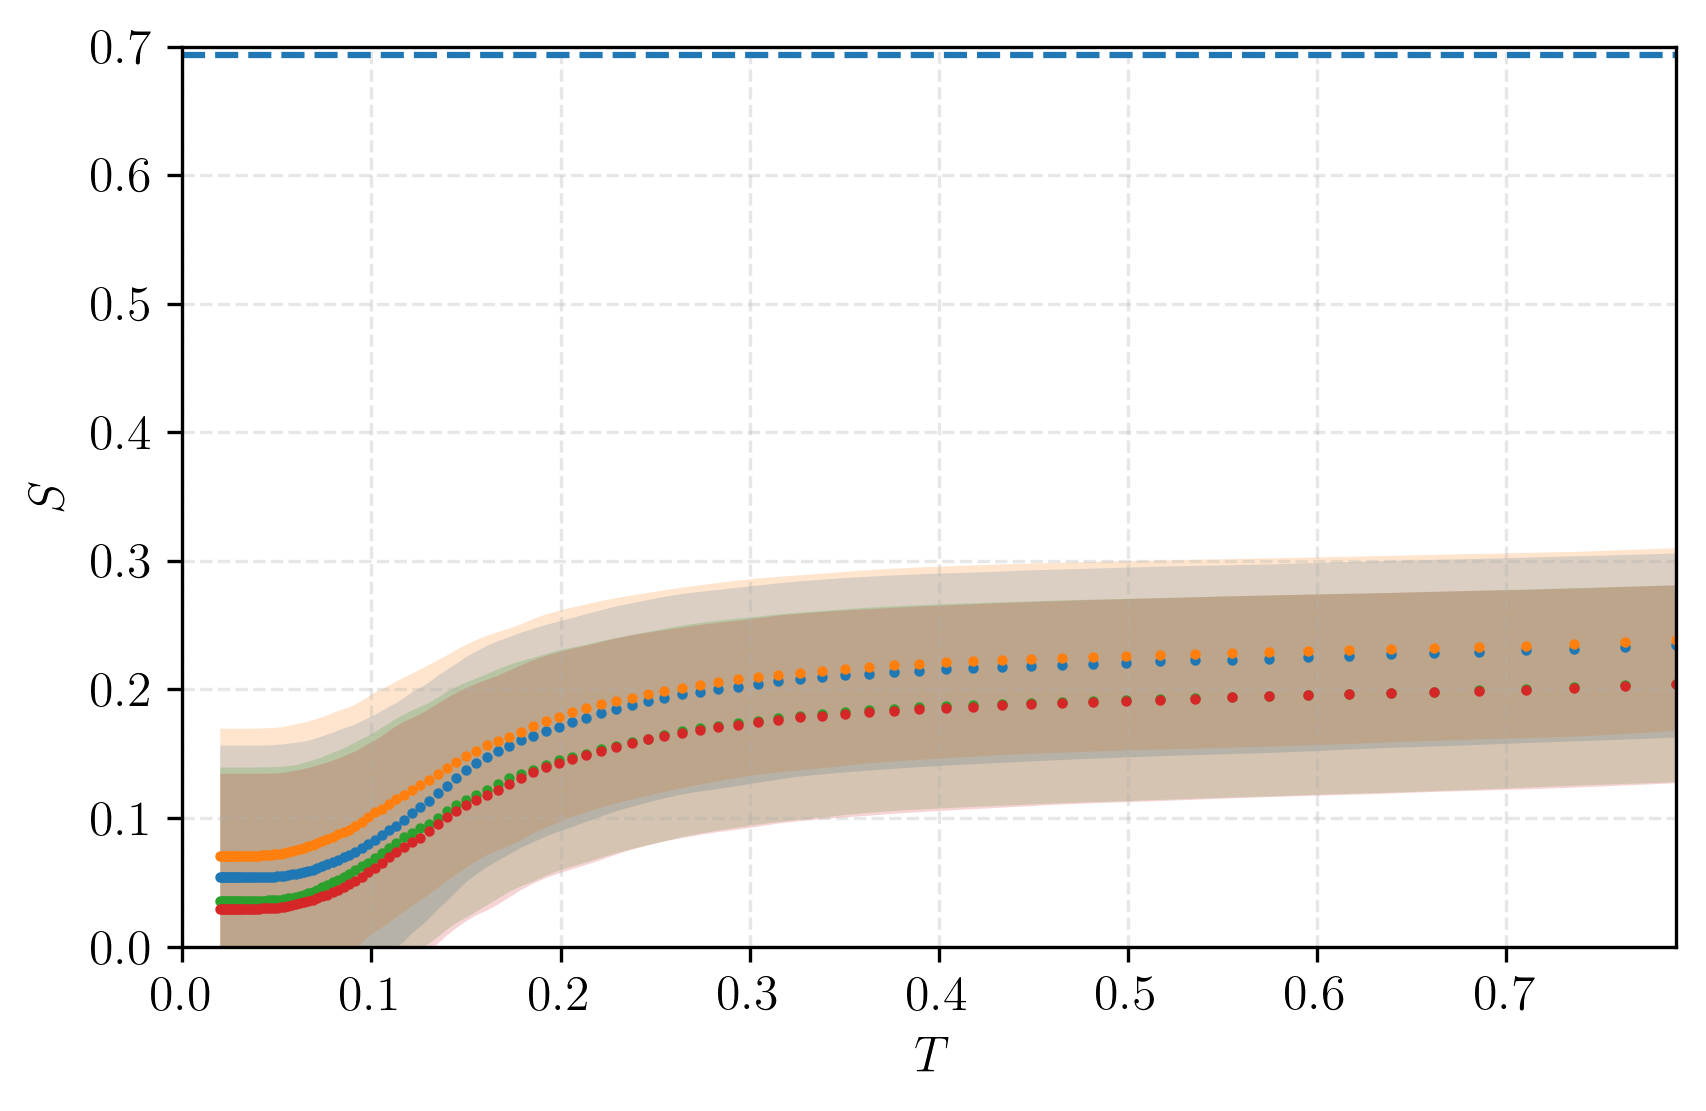

In [16]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
#for i in range(n):
#    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
#                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
#
#
if mergeruns:
    nplots = 1
    addsave = "_Merged_"
elif pairruns:
    nplots = n//2
    addsave = "_IndependentRunsTwoRounds_"
else:
    nplots = n
    addsave = "_IndependentRuns_"
    
tidmin = 0
tidmax = [105 for i in range(n)]
if mergeruns:
    tidmax = [len(stat_temps[i]) for i in range(n)]
put_legend = False
af.BulkPlotsE(L, nplots, 0, tidmin, tidmax, temperatures_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC, J1, J2, J3, J4,
              t_h_S, t_h_Smin, t_h_Smax, addsave = addsave,
              figsize = (6,4), markersize = 3, ncol = 2, loc = 'upper right',
              put_legend = put_legend)

In [ ]:
if not mergeruns:
    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(nplots):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_MeanE[i][tidmin:tidmax[i]][:,hid]-t_h_MeanE[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        #plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  - np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  + np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),\
        #                 alpha=alpha)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta E$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.png')

    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(nplots):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_S[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_Smin[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],
                         t_h_Smax[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],\
                         alpha=0.2)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta S$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.png')

else:
    print("S = %f" % t_h_S[0][0], r"+/-", "%f" % max(abs(t_h_S[0][0]-t_h_Smin[0][0]),abs(t_h_S[0][0]-t_h_Smax[0][0])))

In [ ]:
if mergeruns:
    np.savetxt(foldername + results_foldername + "/AvgS.txt", t_h_S[0])
    np.savetxt(foldername + results_foldername + "/AvgSmin.txt", t_h_Smin[0])
    np.savetxt(foldername + results_foldername + "/AvgSmax.txt", t_h_Smax[0])
    np.savetxt(foldername + results_foldername + "/AvgC.txt", C[0])
    np.savetxt(foldername + results_foldername + "/AvgC.txt", C[0])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", ErrC[0])
    np.savetxt(foldername + results_foldername + "/VarE.txt", t_h_VarE[0])
    np.savetxt(foldername + results_foldername + "/ErrVarE.txt", t_h_ErrVarE[0])

In [ ]:
print(foldername + results_foldername)